In [2]:
import pandas
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [14]:
wines=pandas.read_csv('winemag-data_first150k.csv')


## 一、数据可视化摘要
### 1.1 数据集摘要
这是关于葡萄酒评论以及其评分价格和产地的数据集。数据集中包括葡萄酒的[country], [description], [designation], [points],[price], [province], [region_1], [region_2], [variety], [winery]等信息。

In [15]:
cols=wines.columns
print(wines.shape)
print(cols)

(150930, 11)
Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')


#### 1.1.1 标称数据摘要
标称数据有：[country],[province],[region_1],[region_2],[variety],[winery].
统计结果如下所示：

In [64]:
#wines.fillna(value=0,inplace=True)
wine_drop=wines.dropna(how='any')
data_frequency={}
data_fn={}
for name in wine_drop.columns:

    if( name not in ['description','Unnamed: 0']):


        if(wine_drop[name].dtypes not in ['int64','float64']):
            #print(name + 'NaN mount' + wines[name].count(np.nan))
            set1=set(wine_drop[name])
            #print(set1)
            temp_dict={}
            for names in set1:
                temp_dict[names]=list(wine_drop[name]).count(names)
            data_frequency[name]=temp_dict
        else:
            #print(name+'NaN mount'+wines[name].count(None))
            temp_dict = {}
            temp_dict['max']=wine_drop[name].max()
            temp_dict['min']=wine_drop[name].min()
            temp_dict['average']=wine_drop[name].mean()
            temp_dict['median']=wine_drop[name].median()
            l=list(wines[name])
            l.sort()
            temp_dict['Q1']=l[int(len(l)/4)]
            temp_dict['Q3'] = l[int(len(l)*3 / 4)]
            data_fn[name]=temp_dict
          


标称数据频数分析：

In [65]:
for key in data_frequency.keys():
    for key1 in data_frequency[key].keys():
        print(key,key1,'  : ',data_frequency[key][key1])

country 0   :  5
country France   :  21098
country Portugal   :  5322
country Italy   :  23478
country Lebanon   :  37
country Serbia   :  14
country South Korea   :  4
country South Africa   :  2258
country China   :  3
country Bosnia and Herzegovina   :  4
country Argentina   :  5631
country Luxembourg   :  9
country Czech Republic   :  6
country Lithuania   :  8
country US   :  62397
country Chile   :  5816
country Switzerland   :  4
country Greece   :  884
country Moldova   :  71
country Bulgaria   :  77
country Romania   :  139
country Hungary   :  231
country Canada   :  196
country Mexico   :  63
country England   :  9
country Tunisia   :  2
country Uruguay   :  92
country Israel   :  630
country Ukraine   :  5
country Turkey   :  52
country Slovakia   :  3
country New Zealand   :  3320
country Macedonia   :  16
country US-France   :  1
country Spain   :  8268
country Brazil   :  25
country Morocco   :  12
country Croatia   :  89
country Egypt   :  3
country Austria   :  3057
co

designation Vigna Colle Barabba   :  1
designation Calanican Nero d'Avola & Merlot   :  1
designation Koberner Weissenberg Auslese   :  2
designation Saignée   :  3
designation Bradford Mountain   :  3
designation Cuvée M   :  10
designation Tenuta Valleselle Rovertondo   :  2
designation Kyklos   :  2
designation Los Chamazal Vineyard   :  1
designation Seddon   :  1
designation Padthaway Reserve   :  1
designation Cask 520   :  5
designation Jules Sauvignon Blanc/Colombard   :  2
designation Cicinis   :  5
designation Roda Reserva   :  5
designation Rocchettevino   :  9
designation White Blend   :  5
designation Weinbau Vineyard Road Less Traveled   :  1
designation C Blanc du Castel Kosher   :  2
designation Terra de Touros   :  5
designation Al Haberle   :  2
designation Treehouse Cabernet Sauvignon-Merlot-Cabernet Franc   :  1
designation Clos du Mesnil   :  3
designation Blason Brut Rosé   :  8
designation Generations   :  19
designation Saint Georges   :  1
designation Oyster Ri

designation Gravières Premier Cru   :  16
designation Tina Marie Vineyard   :  12
designation Serra Fiorese Riserva   :  2
designation Nueva   :  1
designation Sombrero Rojo Crianza   :  3
designation Sous le Dos d'Ane Premier Cru   :  5
designation Snipes Vineyard   :  3
designation Poor Ranch Vineyard   :  1
designation Olivet Grange Vineyard   :  1
designation Unique Blend Red   :  2
designation La Tulipe   :  1
designation Estate Grown Drummond Block   :  1
designation Camilla   :  4
designation Josef Vineyard   :  1
designation Bottaccia   :  2
designation Medalla Real   :  1
designation La Fabriseria   :  6
designation Équinoxe   :  1
designation Stolo Vineyard   :  1
designation Ode To Merriment   :  1
designation Biscondola   :  2
designation Percarlo   :  2
designation Charme   :  3
designation La Nuit Magique   :  4
designation Blend Two   :  3
designation Sunnyside Single Vineyard   :  3
designation Dierberg Block Five   :  2
designation Monte de Milieu Premier Cru   :  2
de

designation Les Eléments   :  1
designation Pop Rosé Extra Dry   :  1
designation Taja Reserva   :  4
designation Lagomarsino Vineyard   :  2
designation Lot Number 19   :  2
designation Riflessi di Sole   :  1
designation Phelps Creek Vineyard Les Chênes   :  1
designation Jovis Italic Blend   :  1
designation Blockhouse   :  2
designation Clos Apalta   :  11
designation Intuition   :  1
designation Duet Lex   :  1
designation Cara Mia Vineyard Bel Canto Red Wine   :  1
designation Dianthus Estate Mourvèdre-Grenache-Counoise   :  1
designation Logging Road Block Estate   :  1
designation Baron de Chirel Reserva   :  2
designation Kremser Tor Alte Reben Reserve   :  1
designation Solomon Hills Vineyards   :  2
designation Gap's Crown Vineyard   :  33
designation Clava Reserve   :  4
designation Bacigalupi   :  1
designation Dulcemar   :  1
designation Clos des Capucins Cuvée Ste Catherine Schlossberg Grand Cru   :  1
designation Stuller Vineyard   :  2
designation Vintage X Proprietor 

designation Sachia   :  6
designation Rapet   :  5
designation Château de Saint Lager   :  2
designation 33 Degrees North Gracie Hill Vineyard, Dalla Collina   :  2
designation Camel Hill   :  1
designation Château Bertinat Lartigue   :  3
designation Chocapalha Reserva Tinto   :  1
designation Native   :  3
designation El Alma de Jonata   :  2
designation Somdinou Samsó Vinyes Velles   :  1
designation B de Becker Extra Brut   :  1
designation Got Away   :  1
designation Macchion del Lupo   :  5
designation Cutthroat Blend   :  1
designation Juan Rojo   :  1
designation RunRig   :  3
designation Schloss Trocken   :  1
designation Villa di Monte   :  1
designation Plénitude   :  7
designation Mara   :  8
designation Vigna Quattro Confini   :  1
designation Lailum Riserva   :  2
designation Valle Huarpe   :  3
designation Tappa Pass Vineyard Selection   :  4
designation Rose of Virginia   :  1
designation Continone   :  2
designation La Luna e i Falò   :  1
designation Prior Brut   :  9

designation Gaudium   :  6
designation Optimus   :  3
designation Lancers Rosé   :  2
designation Special Select   :  8
designation Private Collection Malbec Brut Rosé   :  1
designation Symmetry Meritage   :  3
designation Lone Cypress Ranch   :  2
designation Landa Vineyards   :  3
designation La Grivelière Tete de Cuvee   :  3
designation Estate Fe Ciega Vineyard   :  1
designation Mozia   :  1
designation Syrah-Carignan Reserva   :  1
designation Noble Roth Late Harvest   :  1
designation Port of Cabernet Sauvignon   :  1
designation Pennacchio Vineyard   :  3
designation Nuestra Sangre   :  2
designation Coma Vella   :  1
designation Elcione   :  2
designation Nectar   :  2
designation Paraiso Vineyards Reserve   :  1
designation Founders Reserve   :  8
designation Floresta Apalta   :  2
designation Dante's Inferno   :  1
designation Le Mesnil Blanc de Blancs Brut   :  2
designation Westhofener Morstein Trockenbeerenauslese   :  1
designation Sélection Prestige   :  2
designation 

designation Shannon Ranch   :  3
designation Loibner Smaragd Vinothekfüllung   :  4
designation Lanzaga   :  9
designation Poggiassai   :  2
designation Rosé et Or   :  1
designation Fleur de Rosé   :  1
designation Brut Réserve   :  20
designation En Vesvau   :  4
designation Adriano Branco   :  3
designation Colomba Platino   :  12
designation Cuvée Sasha Monte Lago Vineyard   :  1
designation W.P. Foley II   :  1
designation Les Terres Grillées   :  1
designation La Louvée   :  3
designation Leland   :  8
designation The Soul of Argentina Reserve   :  1
designation Brauneberger Juffer Kabinett   :  5
designation Centurion, Old Vine   :  1
designation Cuvée Zaccharie   :  1
designation Le Sponde 500 ml   :  1
designation Foggy Hill Vineyard   :  3
designation Rüdesheimer Berg Rottland Kabinett Trocken   :  1
designation Museum Reserve Antique Tawny   :  1
designation Krysos   :  1
designation Tourmaline Vineyard Inspired   :  1
designation Il Valpolicella Ripasso   :  1
designation F

designation Sawtooth Vineyard   :  1
designation Milenage   :  1
designation Cyrano de Bergerac   :  6
designation Les Vignes d'Elisa   :  2
designation Patrona   :  2
designation Braccale   :  7
designation Mungo Park Single Vineyard   :  1
designation Hadley's Cuvee   :  2
designation Tenuta Guado al Tasso   :  1
designation Clos de L'Obac   :  3
designation Trinkvergnügen No 6   :  2
designation Murray   :  2
designation Wallstrum Family   :  2
designation Cimarron   :  3
designation 10 Anos Collections Tawny   :  1
designation Letras   :  1
designation Hochheimer Kirchenstück Erstes Gewächs  Trocken   :  1
designation Le Vigne Rare   :  2
designation Shameless   :  1
designation Bolanda Crianza   :  2
designation Contre le Vent   :  2
designation La Mission Premier Cru   :  2
designation Naia Des   :  1
designation Perbruno   :  6
designation Zipolo   :  1
designation Grosse Reserve   :  3
designation Nostalgia   :  1
designation Loibner Burgstall Federspiel   :  1
designation Motl

designation Pizzo del Vento   :  2
designation Solus   :  5
designation Cuvée Terre Blanche   :  1
designation Balboa Reserve Estate   :  1
designation Königsbacher Idig Spätlese Trocken   :  2
designation Cuvée Collection Prestige   :  2
designation Mountain Road Reserve   :  2
designation The Climber   :  12
designation Reserva Selección   :  1
designation Colonia Las Liebres   :  1
designation Niersteiner Hipping Auslese   :  1
designation Tribute Series Pat Quinn   :  2
designation Hiller Simone I Wine & Queen   :  1
designation Sierra Mar Vineyard   :  27
designation Rosé de Bonnet   :  1
designation Erse Bianco   :  1
designation Wein Manufaktur Krems   :  1
designation Crawford Beck Vineyard   :  6
designation Vigna Roreto   :  3
designation Spring Wine   :  4
designation Altero   :  12
designation Nervo   :  1
designation Sincérité   :  2
designation La Gille   :  1
designation s. XII Cluny   :  1
designation Gold Rush Old Vines   :  1
designation Sélection Cabernet Sauvigon Gr

designation Volvoreta Probus   :  2
designation Block #3 Lawrence Vineyard   :  1
designation Wild Alfalfa   :  1
designation Liquid Velvet   :  1
designation Aya   :  1
designation Cuvée Anne-Laure   :  7
designation Money Road   :  1
designation Alvarinho Portal do Fidalgo   :  1
designation Torre de Golbán Crianza   :  5
designation Arthémis   :  2
designation Wattle Park   :  4
designation Homestead Reserve   :  6
designation Artisan Series Ma Belle Red   :  1
designation Carrie's   :  4
designation Monta da Baía Branco   :  2
designation Caballo Blanco Vineyard   :  1
designation Red Cedar Vineyard Cuvée Blanc   :  1
designation Loibner Steinertal Smaragd   :  5
designation Setzberg Smaragd   :  3
designation Blend Malbec-Cabernet Sauvignon-Merlot   :  1
designation Vorgeschmack   :  1
designation 505   :  2
designation Picolit   :  4
designation V. Single Vineyard   :  4
designation The Vines Shiraz-Cabernet Sauvignon-Merlot   :  2
designation Ryo-Fu   :  2
designation The Harris

designation Pietracalda   :  2
designation Punggl   :  3
designation El Jabalí Vineyard - Mt. Eden Clone   :  1
designation Fleurieux   :  1
designation Cheval Rouge Reserve   :  1
designation Promis   :  1
designation Confluence   :  2
designation Spruce Goose   :  7
designation Nipozzano Riserva   :  7
designation Salisbury Vineyard   :  3
designation Lady in Red   :  2
designation Barrel Select Unfiltered   :  2
designation Terra Amata Chusclan   :  4
designation Cuvée Suivez-moi Jeune Homme   :  3
designation Old Vines Dry   :  1
designation Klindt Vineyard   :  9
designation Acero Don Miguel Vineyard Unoaked   :  3
designation Serrata Belguardo   :  4
designation Marcarini   :  4
designation The Bohan-Dillon Estate   :  1
designation Roncão 20-Year-Old Tawny   :  4
designation Clos de l'Obac   :  4
designation L'Esprit de Sainte Marguerite   :  1
designation Bannockburn   :  8
designation San Rocco   :  11
designation Wall Vineyard   :  5
designation Pievecroce   :  3
designation 

designation Le Petit Lion de Léoville las Cases Barrel Sample   :  1
designation Tre Venezie   :  1
designation Millénaire   :  2
designation Chortais Natural Sweet   :  1
designation Dundee Hills Vineyards   :  2
designation Rapley Trail Vineyard Estate Grown   :  1
designation Tradition de Calavon   :  1
designation Highland Estates Hawkeye Mountain   :  2
designation Ellie's   :  4
designation Quinta de Lourosa   :  3
designation Tradition Premier Cru Brut   :  1
designation Le Gresigny Premier Cru   :  1
designation Cabeça de Toiro Reserva   :  10
designation T.R. Passalacqua Vineyard   :  5
designation Select Private Reserve   :  4
designation Domaine Sainte-Claire   :  2
designation Casa De Vinas, Reserve   :  1
designation Loibner Vision Smaragd   :  2
designation Daniello   :  6
designation Fagan Creek Block 38 Reserve   :  1
designation Cosecha   :  10
designation Tradição Tinto   :  2
designation Ricordati   :  2
designation Monte Cascas   :  2
designation Reale   :  1
design

designation Quattuor Blanc de Blancs Brut   :  3
designation Cuvée William Deutz Brut Rosé   :  1
designation Left Field   :  3
designation Eternity   :  1
designation Select Vineyard Series Fish Net Creek   :  1
designation Selva   :  2
designation The Fumé   :  7
designation L'Apogée Vieilles Vignes   :  2
designation Continuité de Nature   :  1
designation Metronome   :  2
designation Quinta das Heredias Ruby Special Reserve   :  1
designation Fire Hydrant Red   :  2
designation Pichl Point Smaragd   :  1
designation Symphony 3   :  1
designation Santo Giordano Vineyard Belle Torrette   :  2
designation Mátraalja   :  2
designation Holbrook Mitchell Vineyard   :  3
designation Hilltop   :  10
designation Mouton Cadet Rouge   :  2
designation Barrua   :  2
designation DOC   :  1
designation Oakville   :  1
designation Carneros Highway   :  3
designation Clos de la Roilette   :  2
designation Monprà   :  1
designation Passopisciaro   :  1
designation Mineral Springs Ranch   :  2
desig

designation Rock Solid Red   :  1
designation Boreal Red Wine   :  2
designation Clift Vineyard   :  7
designation Riverboat Smooth Sweet   :  1
designation Dutton Ranch Walker Hill Vineyard   :  1
designation Wells   :  1
designation Duca di Saragnano   :  1
designation Undhof Kögl Reserve   :  3
designation Justice   :  3
designation Km 501 Dry   :  2
designation Occhio di Pernice Dolce Sinfonia   :  1
designation Extended Elevage   :  1
designation Fonte del Re   :  2
designation Rancher's   :  1
designation Belcanto Extra Dry   :  7
designation Terres Burgondes   :  1
designation Clos du Lune Vineyard   :  1
designation Ziesel   :  1
designation Ingle Vineyard   :  16
designation Vigna Pirochetta   :  3
designation Vignes Vieilles   :  1
designation Sabri   :  2
designation Contention   :  1
designation Joy!   :  2
designation Ugolino   :  2
designation Crazy Mary   :  2
designation Terras do Vale   :  2
designation Granite Hill Reserve   :  3
designation Coteaux de Colette   :  1


designation Les Femelottes   :  2
designation Estate Bottled Vinho Tinto   :  2
designation Opera Prima Sparkling Moscato   :  1
designation Matar Stratus   :  1
designation Aries   :  3
designation Isolation Ridge Vineyard   :  9
designation White Barbera   :  1
designation Trittenheimer Apotheke Eiswein   :  1
designation Ai Palazzi   :  1
designation Beachfront   :  5
designation El Albar Barricas   :  1
designation The Zin   :  2
designation Les Tours   :  3
designation Perotti Vineyards   :  3
designation Quinta da Garrida   :  5
designation Bordeaux Rouge   :  1
designation Cuvée Elena   :  3
designation Piaggione   :  2
designation Vigna Senza Nome   :  1
designation Tendresse   :  1
designation Hand Picked Single Site Hahn Farm Vineyard Light Pass   :  2
designation Le Clarence de Haut-Brion Barrel Sample   :  2
designation Convento S.S. Annunciata   :  1
designation Cape Roca Lighthouse   :  2
designation Aria Estate Brut   :  11
designation Grand Prestige Brut   :  1
designat

designation Pietralava Bianco   :  1
designation Cabernet Sauvignon Rosado   :  3
designation Mosconi   :  1
designation Clos Jebsal Turckheim Vendange Tardive   :  1
designation Le Grance   :  1
designation Casteller Schlossberg Beerenauslese   :  1
designation Pedrouzos 1.5L   :  2
designation HJW Vineyard   :  1
designation Axia   :  1
designation Epicenter Old Vines   :  1
designation Super T   :  1
designation Estate Barrel Select   :  4
designation Conceito   :  6
designation Cuvee Henri   :  4
designation Enrico Brut   :  1
designation Empyrée   :  3
designation Oak Lane Chenin Blanc-Sauvignon Blanc   :  1
designation Empreintes   :  5
designation Château du Clos   :  1
designation Selección Millennium Brut   :  1
designation Velvet Sisters   :  2
designation Les Vieux Murs   :  2
designation Trinders   :  1
designation Chevalier-Montrachet Grand Cru   :  2
designation Cantalupi   :  13
designation Dijon 76 Clone   :  2
designation Les Baptaurels   :  2
designation Terrisses   :

designation Samora   :  6
designation Opera Semplice   :  1
designation Philtrum Blanc   :  1
designation Riserva 0,618   :  3
designation Vigneto La Casuccia   :  2
designation Fritz Fisk   :  1
designation Bocca di Rosa   :  1
designation Plumbago   :  1
designation Aurosa   :  2
designation Bella's Blend   :  7
designation Bastoni Vineyards   :  1
designation Il Margone Riserva   :  2
designation Les Volcans   :  1
designation Tom's Block   :  2
designation Três Bagos Sauvignon   :  4
designation Domaine la Chapelle des Bois   :  1
designation Grand Brut Blanc   :  3
designation Hand Picked Botrytis   :  3
designation Terre di Rubinoro   :  1
designation Domaine de la Créa Les Cent Vignes Premier Cru   :  1
designation Clos du Bourg Sec   :  3
designation Estate Made With Organic Grapes   :  1
designation Apostoles Palo Cortado Viejo   :  1
designation Paparuda Rezerva   :  2
designation Grand Terroir Tautavel   :  2
designation Bonita's Hill Don Miguel Vineyard   :  2
designation F

designation Extra Dry San Nicola   :  1
designation Roadside Market   :  1
designation Valmaggiore Riserva   :  4
designation Diamante Semi-Sweet Malvasia-Viura   :  5
designation Gold Reserve Single Vineyard   :  2
designation Red Dirt   :  2
designation La Nieta   :  14
designation October Night   :  4
designation Holder   :  4
designation The Boot Red Wine   :  1
designation Y Series Sangiovese   :  1
designation Piedra Feliz   :  3
designation Les Croix   :  2
designation Clos du Noyer   :  1
designation Patrimonio   :  10
designation Salvatore Principe Mi Amore   :  1
designation Meadow White Wine   :  1
designation Melville Vineyards   :  4
designation Gaubança   :  2
designation Monte do Carrapatelo   :  4
designation Hommage   :  5
designation Jesse's Vineyard   :  1
designation Graham Family Vineyard   :  11
designation Le Viognier   :  2
designation Voyou Rosé   :  3
designation Four Soil Melange   :  2
designation Bridão Classico   :  5
designation Monte Dulce Sangiovese   :

designation Camel Hill Vineyard   :  9
designation Clarum   :  3
designation Vi No SO2   :  2
designation Estate Blend Private Reserve   :  5
designation Summitville Vine Ranch   :  1
designation Reserve Assemblage Sauvignon Blanc-Chardonnay-Viognier   :  5
designation Torre di Ceparano   :  3
designation Imperial Kir   :  4
designation Lot 126   :  2
designation Troppo Bella   :  3
designation Patriarche Blanc   :  6
designation Marston Vineyard   :  4
designation Guado dè Gemoli   :  5
designation Wehlener Klosterberg Kabinett   :  1
designation Alouette   :  2
designation Monti Lessini Brut   :  2
designation Vall Sanzo   :  2
designation Ultra Brut Nature   :  1
designation La Balade   :  1
designation Dry Red Wine No. 1   :  5
designation Santenay-Beauregard Premier Cru   :  1
designation Usibelli Vineyard   :  1
designation Cuyama River   :  6
designation Jimmy Section   :  4
designation Bald Mountain   :  2
designation Chestnut Hill   :  2
designation Savoy   :  6
designation La

designation Enamore   :  6
designation El Jefe – En Chamberlin Vineyard Red   :  1
designation Molly's Estate   :  1
designation Pago Negralada   :  3
designation Hacienda-Secoya   :  1
designation Latinia   :  2
designation Sensitive Cousin   :  2
designation Cuvée Tsar Pierre le Grand   :  2
designation Fralibri   :  1
designation Block G + I   :  1
designation Conti Capponi   :  1
designation Incredible Red Bin 116   :  3
designation Five Roses   :  3
designation Steinmassl Reserve   :  1
designation Signature Reserve   :  3
designation Fino Una Palma   :  1
designation L'Hereu Reserva Brut   :  1
designation Fisetta   :  1
designation Lamanuzzi & Pantaleo Vineyard Gambono   :  1
designation Inspiración Las Canteras   :  1
designation Novas Gran Reserva Made with Organically Grown Grapes   :  2
designation Cuvée Marilyn   :  2
designation Belle Epoque Brut   :  1
designation Rochioli & Allen Vineyards   :  1
designation Robbins Vineyard   :  1
designation Tolleson High Corniche   : 

designation Branco Real   :  1
designation 'l Clumbé   :  4
designation Dijon 76 Estate   :  4
designation Lynch Knoll Vineyard   :  1
designation Stone Tree Vineyard Intuition Reserve   :  1
designation Burja Noir   :  1
designation Lick My Lips   :  3
designation Extra Cuvée de Réserve Brut Rosé   :  1
designation Pietra Rossa   :  1
designation Michel Forget Grand Cru Brut Rosé   :  1
designation Polkadraai   :  5
designation Red Mountain Red   :  3
designation Subduction Red   :  6
designation Magia Negra Ensamblaje   :  1
designation Bosco di Gica Brut   :  8
designation La Joie   :  3
designation Cuvée les Vieux Granits   :  1
designation Les Porrets Premier Cru   :  3
designation Medalla Real Gran Reserva   :  2
designation Escolha   :  8
designation Perle de Nuit Blanc de Noirs Brut   :  6
designation Hochheimer Classic   :  1
designation Te Muna Road Vineyard   :  18
designation Termeão   :  5
designation Cuvée Oro Dry   :  2
designation Riserva Le More   :  4
designation Domi

designation Holbrook Mitchell   :  1
designation Cuvée Nathan   :  1
designation Peay Vineyard   :  14
designation Woodburne Cuvée   :  2
designation Porca de Murça   :  1
designation La Porfia Reserve   :  2
designation Colección Privada Finca Las Cerrillos   :  1
designation Esprit Blanc de Blancs Brut   :  2
designation Thompson Vineyard Reserve   :  1
designation Charta Kabinett   :  2
designation Conca D'Oro   :  2
designation Rio Sordo   :  8
designation Gala 3   :  3
designation Frauenfeld   :  3
designation Asbill Vineyard   :  3
designation Muralhas de Monção   :  4
designation Hattenheimer Kabinett   :  2
designation Clos St. Landelin   :  3
designation La Charnivolle   :  3
designation Starr Ranch Vineyard   :  1
designation Rhein Tafelwein   :  1
designation Bricco Pernice   :  1
designation Syrah du Soleil   :  1
designation Indian Creek Vineyard   :  2
designation La Coppa   :  3
designation Serre   :  9
designation Horseshoe Vineyard   :  1
designation Punto Final Reserv

designation Hidden Horse Red Blend No. 9   :  1
designation The McRae Wood   :  3
designation Victorino   :  7
designation Banda Dorada White   :  1
designation Vinhas do Lasso Colheita Seleccionada   :  2
designation Winemakers 25th Anniversary   :  2
designation Rüdesheimer Halbtrocken   :  1
designation Sciasci   :  2
designation Château du Barail   :  1
designation Julian   :  1
designation Aureo   :  1
designation Broken Stone   :  4
designation Cuvée Nicole Brut   :  1
designation Diana's Reserve   :  4
designation Reserve Signature   :  2
designation Sinister Hand Red Wine   :  2
designation Premier Cru Récolte du Château de Chassagne-Montrachet   :  1
designation Giant Steps Vineyard Dijon Clones 114 & 115   :  2
designation Côte de Léchet Premier Cru   :  7
designation Watervale   :  16
designation Lucy Rosé of   :  1
designation Riserva di Monna Lisa Gran Selezione   :  1
designation Expresion   :  1
designation Domaine Cézanne   :  1
designation Don Guido Aged 20 Years Rare 

designation VCZ Molendores   :  1
designation Brut Impérial Rosé   :  2
designation Tenuta Belguardo   :  10
designation Henry Ranch   :  3
designation Artazuri Garnacha   :  1
designation Il Campo Estate Field Blend   :  3
designation Vigna Casalj   :  1
designation Carolina Marengo   :  7
designation Knight Vision   :  1
designation New Zealand Falcon   :  2
designation La Varenne du Poirier   :  3
designation Cypress Vineyard   :  2
designation Edna Ranch Lily Gil   :  1
designation Millesimato Cuvée Tenuta Val de Brun Extra Dry   :  5
designation Limited Estate Reserve Tatria Meritage Red Table Wine   :  1
designation Aliette   :  1
designation Durell Vineyards   :  1
designation Arthur   :  5
designation Biagio   :  7
designation Limited Release X Clones Estate   :  1
designation Kite's Rest   :  4
designation Estate Stone Corral Vineyard   :  5
designation de Nit   :  2
designation Beckstoffer To Kalon Vineyard TK2   :  1
designation Gouttes d'Or Premier Cru   :  5
designation La

designation Norie   :  2
designation Rim Rock   :  3
designation Flavium Selección   :  1
designation Dados  Reserva   :  2
designation Whole Cluster   :  16
designation Limited Production   :  13
designation Blend 25 Cabernet Sauvignon-Syrah   :  1
designation Flor de Garnatxa   :  1
designation Viñedo Las Vertientes   :  1
designation Edición Rosa   :  1
designation Zero Nove Brut   :  1
designation Cupola   :  2
designation Benedè   :  1
designation The Pundit   :  1
designation MV Trí3   :  1
designation Flora Ranch Syrah Rosé   :  2
designation Somerston   :  1
designation Longford   :  1
designation Artetica   :  1
designation Turckheim   :  2
designation Mansois   :  3
designation Orzada Tres Esquinas Organic   :  2
designation Morrison Lane Vineyard   :  5
designation Achleiten Stockkultur   :  2
designation Jess   :  2
designation Vat 47   :  5
designation McGinlay's Vineyard   :  2
designation South Block   :  3
designation Jaume de Codorniú Brut   :  1
designation The Archit

designation Vigna Poggio Ronconi   :  2
designation Vom Urgestein   :  3
designation Pasiteo   :  4
designation Monarch Mine Vineyard   :  28
designation Laas   :  1
designation Domaine du Château Gris Premier Cru   :  2
designation Diamarine   :  2
designation Prélude Grands Crus Brut   :  3
designation Winemakers Collection   :  9
designation L'Ingenue Naggiar Vineyard   :  2
designation Mertert Herrenberg Grand Premier Cru   :  3
designation Assajé   :  3
designation Encontro Q do E Blanco Bruto Classico   :  1
designation Château Bazin   :  3
designation Sugarloaf Mtn. Vineyard   :  3
designation Bitch Bubbly   :  2
designation B-Bar-X Ranch Reserve   :  1
designation Aszú 6 Puttonyos   :  12
designation Hi Vista Vineyard   :  4
designation È 100 Per Cento   :  1
designation Mount Maude   :  2
designation Premium Fine Tawny   :  2
designation La Chêneraie   :  2
designation Coyote Vineyard Reserve   :  2
designation Founder's Selection   :  14
designation JSM   :  1
designation Res

designation Minelli   :  1
designation Espirito Branco   :  3
designation Blanc Pescador   :  1
designation Red4   :  1
designation Juvelo   :  2
designation Clifton Vineyard   :  8
designation La Marescialla   :  3
designation Yá Cuvée 23 Brut Rosé   :  2
designation Snows Lake   :  1
designation Vintage Rosé Brut   :  4
designation Arindo   :  1
designation Thatcher Bay   :  1
designation Queste   :  1
designation Riserva del Fondatore   :  2
designation La Croix d'Argon   :  2
designation Agiorgitiko (St. George)   :  5
designation El Caballero   :  2
designation Alò   :  1
designation Fina Reserva Ensamblaje Malbec-Cabernet Sauvignon-Syrah   :  1
designation Tawny Ten Years Old   :  1
designation Parable   :  3
designation Tridentum Dosaggio Zero   :  1
designation Dion Carlo   :  1
designation Orpheus III   :  3
designation Castillo de Alicante Gran Selección   :  1
designation Vivante   :  2
designation Preposterous   :  1
designation Krupp Vineyard   :  6
designation Domaine Adé

designation Le Volpare   :  12
designation Tamarez   :  2
designation Priscilla Vineyard   :  1
designation The Dissident   :  5
designation Reserve Assemblage Syrah   :  2
designation Pavillon Blanc de Château Margaux Barrel sample   :  1
designation Bella Vida Vineyard Unfiltered   :  2
designation Reserva Upland Vineyard   :  1
designation Passetemps Premier Cru   :  1
designation Poetico   :  6
designation Domaine Grand Veneur Les Origines   :  1
designation Grand Cuvée Fournier   :  4
designation Thunderbolt   :  4
designation Liebfrauenstift-Kirchenstück Spätlese   :  1
designation Estalét   :  3
designation Ryan's   :  1
designation Old Vines Reserva   :  10
designation Carneros Estate   :  2
designation Lucia Highlands Vineyard Estate   :  2
designation San Andreas Estate Vineyard   :  2
designation Drouhin-Vaudun Premier Cru   :  1
designation Ronna   :  1
designation Primeras Viñas   :  4
designation American Oak   :  3
designation Clos Paradis Premier Cru   :  4
designation 

designation Caspagnolo   :  3
designation Perle de Roseline   :  4
designation Les Chapitres de Jaffelin   :  2
designation Herea Frappato Rosato   :  3
designation Final Final   :  1
designation Dürnsteiner Kellerberg Reserve   :  2
designation Kollmütz Smaragd   :  2
designation Bitch   :  2
designation Santigaini   :  3
designation Cargasacchi Jalama Vineyard   :  3
designation Riserva Biagio   :  1
designation Giallo Solare   :  1
designation Les Belles Bastilles   :  1
designation Su'skol Vineyard   :  3
designation Nocturne   :  5
designation La Sughera Rosso   :  3
designation Rivalta Limited Selection   :  4
designation Gocce di Luce   :  1
designation Lot 121   :  2
designation Campora   :  13
designation Kosher Red Wine   :  3
designation Maximus Red Feasting Wine   :  1
designation Chateldon Gran Reserva   :  4
designation Colle Imperatrice   :  1
designation Pierre Léon   :  1
designation Winemaker's Reserve   :  33
designation Grosser Satz   :  1
designation Rinaldi   :  3

designation Bougros Grand Cru   :  9
designation Bliss   :  6
designation Solo   :  3
designation Traditional Late Bottled Vintage   :  1
designation Les Fourchaumes Vieilles Vignes   :  1
designation Reserve Ruby   :  9
designation Woolsey Road Vineyard   :  3
designation Serragrilli   :  10
designation Morgado da Canita   :  2
designation Les Brugueres   :  1
designation Hands   :  1
designation Riserva Ducale   :  2
designation Choreography   :  6
designation TMV White   :  2
designation Estate Grown Red Icon   :  1
designation Wilfreda Blend   :  1
designation Care   :  2
designation Anna   :  1
designation Osterberg Grand Cru   :  8
designation Château de Bellevue Climat les Charmes   :  1
designation Terroir Series Corte Malbec-Cabernet-Petit Verdot   :  1
designation Devil's Corner   :  4
designation Kosher Yasmin White   :  3
designation Bradford Mountain Vineyard Gravity Flow Block   :  1
designation Crowley Station Vineyards   :  2
designation Yacochuya   :  1
designation Le 

designation Terroir Series Edición Limitada Finca las Piedras   :  1
designation Pequeño João   :  2
designation Branco Colheita   :  3
designation Terracotta   :  3
designation Single Vineyard Estate   :  7
designation Optimum   :  5
designation Luccio   :  3
designation Nimbus Single Vineyard   :  15
designation Cuvée Moriah   :  2
designation José S. Ferrer Selection   :  1
designation Elerding Vineyard Reserve   :  2
designation Scaccomatto   :  2
designation Chapelle de Maillac   :  2
designation The Party Starter   :  1
designation Croix de Beaucaillou Barrel sample   :  3
designation Riserva Comitissa Brut   :  1
designation Doña Isidora   :  2
designation Testamatta Soffocone di Vincigliata   :  1
designation El Vínculo   :  1
designation Delailie   :  1
designation Cigarra Reserva Shiraz-Touriga Nacional   :  1
designation Syrah-Viognier   :  2
designation LZ   :  4
designation Sur la Roche   :  1
designation Reed   :  3
designation Secret Reserve   :  7
designation Lot 10   :

designation Culpeo   :  2
designation Santola   :  7
designation Balo Vineyard   :  7
designation Vintner's Select Unfined & Unfiltered   :  3
designation Poggiolo   :  2
designation PR1MUM   :  1
designation Les Pouches   :  2
designation Les Fées Brunes   :  1
designation River's   :  2
designation Capitoni   :  2
designation Solear Manzanilla   :  1
designation Oak Savanna Vineyard   :  2
designation Vineyard Blend   :  4
designation 70% Sémillon/26% Sauvignon/4% Muscadelle   :  3
designation Special Reserve Dry White   :  1
designation Sauvignon Blanc-Macabeo   :  3
designation Bougros Côte Bouguerots Grand Cru   :  1
designation Red Cedar Vineyard   :  5
designation Riverina Botrytis   :  1
designation Ghielmetti Vineyard Clone 337   :  1
designation Maza Cruz Cima   :  1
designation Lieu-dit Rosnay Demi-Sec   :  2
designation Le Temps des Vendanges   :  1
designation Tomahawk   :  1
designation Rosé Bruto   :  2
designation Vigna Castellero Riserva   :  3
designation Archimede   

designation Armand Kabinett   :  2
designation Falcon Glen Vineyard   :  1
designation Assyrtiko   :  3
designation Reserve Santa Barbara-Sonoma   :  1
designation Black Crow   :  1
designation Centine Bianco   :  1
designation Vinha do Reino   :  1
designation P du Roy   :  3
designation Rosé Arcadia   :  3
designation Gran Reserva Brut   :  1
designation Templários Colheita Seleccionada   :  3
designation Lot 103   :  2
designation Le Mignon   :  4
designation Grassini Family Vineyard   :  3
designation Dry Pinot   :  1
designation Espinhal Tinto Reserva   :  1
designation Rosa-Goldlack Beerenauslese 375 ml   :  6
designation La Vigne de Beaussoppet   :  1
designation Amethystos Rosé   :  2
designation Alba Cor White   :  1
designation Storm Front Red   :  2
designation Glass House Vineyard   :  1
designation Vintner's Reserve Summation   :  2
designation Lawrence Vineyards Freyja   :  1
designation Grand Lignée   :  1
designation Viento Valle   :  6
designation Felseneck Wallhausen 

designation Bien Nacido Vineyard Hillside   :  1
designation Union Island Red   :  3
designation La Viña de Corteo   :  2
designation Rangen de Thann Grand Cru   :  1
designation Fleur de Prestige   :  1
designation Manga del Brujo   :  2
designation Isabelino   :  2
designation Côte de Py   :  6
designation Bandolero   :  4
designation Ayrum Reserva   :  1
designation Villa Rizzardi   :  2
designation Trigrammaton   :  1
designation Suacci Vineyard   :  4
designation Burg   :  4
designation Viña el Pison   :  1
designation Rhetico   :  1
designation The Galvo Garage Cabernet Sauvignon-Merlot-Cabernet Franc-Petit Verdot   :  4
designation Serrocielo   :  1
designation Starving Artist Destiny Vineyards Reserve   :  1
designation Valdehermoso Crianza   :  1
designation 20/20   :  2
designation Armujan   :  2
designation Gwendolyn   :  1
designation Leon Riserva   :  1
designation Le Château   :  4
designation Centenary Hill   :  6
designation Viura-Chardonnay   :  8
designation Emotions 

designation Doré   :  1
designation Château Grand Martinet   :  1
designation Eagle's Select Red Wine   :  1
designation Ceremonial   :  3
designation Silenus   :  1
designation McQueen Vineyard   :  4
designation Herea   :  3
designation La Charmille   :  4
designation Rüdesheim Kabinett Feinherb   :  1
designation Westhofener Kirchspiel Spätlese   :  3
designation Lagrein Brut Rosato   :  3
designation Liste   :  9
designation Fort Ross Vineyard High Slopes   :  1
designation Grisant!   :  3
designation Château Nozières   :  4
designation AltoPiano   :  1
designation Sorano Coste & Bricco   :  3
designation 815   :  2
designation Seccopassa 'Appassimento'   :  2
designation Coastview Vineyard   :  5
designation Outis Bianco   :  1
designation Malvoisie   :  2
designation Artz Vineyards Red Wine   :  3
designation Dutton Ranch-Green Valley Vineyard   :  1
designation Sinestesìa   :  5
designation Dubl Rosé   :  1
designation Malma Universo Blend   :  1
designation La Passion   :  1
de

designation Ducceto   :  1
designation Levàntio   :  2
designation Cà del Laito   :  2
designation Fortunati Vineyard   :  3
designation Saint-Rémy   :  1
designation Nectaria Vendimia Tardia Botrytis   :  2
designation Vinha da Tapada   :  2
designation Stolen Block   :  3
designation Walker Cuvée   :  4
designation Throne   :  2
designation Sisu   :  1
designation Albutom Vineyard Estate   :  1
designation Garcia Family Vineyard   :  1
designation Podere San Michelin   :  3
designation Doña Margarita Vineyard   :  2
designation Aux Vignes Clos Rebberg   :  5
designation Vigneto ai Palazzi Riserva   :  2
designation Stony Block Don Miguel Vineyard   :  3
designation Orchard Vineyard   :  1
designation Secret Reserve Petite Syrah Kosher   :  2
designation Casa de Alorna Colheita Seleccionada   :  2
designation Victoria 2   :  2
designation Les Mures   :  1
designation Laetitia Vineyard Clone 777   :  1
designation Oak Lane   :  14
designation James Hardwick   :  6
designation Finca Val

designation Cuvée Cécile   :  1
designation Torremilanos Crianza   :  1
designation Les Dionnières   :  1
designation 10th Anniversary Reserve   :  2
designation The Chard   :  3
designation Côte du Py   :  3
designation Muga   :  1
designation Block Collection - Shorenstein Vineyard   :  2
designation Ried Loibenberg Reserve   :  1
designation High Serenity Ranch Dry   :  2
designation Château des Vierres   :  2
designation Fantaisie   :  2
designation D'Ora White   :  1
designation The Spainnéach   :  1
designation Amado IV   :  1
designation Baker's Gully   :  1
designation Mukuzani   :  1
designation Signature   :  101
designation Beacon   :  2
designation Luchador   :  1
designation Cuvée Vintage Brut   :  1
designation Drink & Dream D+D   :  1
designation Piesporter Goldtröpfchen GG Trocken   :  3
designation The Novelist Meritage   :  2
designation Baron Cuvée   :  3
designation Foglio 38   :  5
designation Rüdesheimer Kabinett Trocken   :  1
designation Albutom Vineyard Estate 

designation Herrenberg Auslese 21   :  2
designation Château de Chamirey La Mission Premier Cru   :  2
designation Inspired   :  2
designation Ürziger Würzgarten Alte Reben GG Trocken   :  2
designation Native Goose   :  5
designation Coast Range Estate Dry   :  1
designation Crianza Grenache-Tempranillo   :  1
designation Picoli   :  1
designation 60/40 Barrel Select   :  2
designation Cardinal's Peak   :  1
designation Dornas   :  2
designation Indie   :  1
designation EA   :  1
designation Jack Ranch Clone 174   :  2
designation Petite Burja   :  2
designation Anne Katherina Vineyard Farmhouse Estate Farmed   :  1
designation Bricco Sarmassa   :  6
designation Le Querce   :  6
designation Cassata Vineyard   :  1
designation Inaugural Vintage   :  1
designation Kies   :  1
designation Bricco di Treiso   :  1
designation L'Erpico   :  2
designation Ikano   :  2
designation Pantheon   :  1
designation In Fine   :  2
designation 30th Anniversary Cuvee   :  1
designation Red Over Heels  

designation Quinta do Encontro Encontro I Branco   :  1
designation Deep River   :  3
designation Tredici   :  1
designation Camp Meeting Ridge   :  2
designation Wiener   :  1
designation N'Oak   :  1
designation Vive-la-Joie Rosé Brut   :  1
designation Rívola   :  6
designation Decima Aurea   :  1
designation Le Rognet   :  1
designation Cuvée Icône du Château Leret Monpezat   :  1
designation Proprietor's Reserve Barrel Fermented   :  4
designation 5 year   :  1
designation Methode Traditionelle Brut   :  1
designation Bin 95   :  1
designation Clarice   :  4
designation Salsus   :  3
designation Chevalier de Saint-André   :  1
designation Le Bord'eaux   :  1
designation In a Heart Beat   :  1
designation L&T Cool Climate Falkenstein   :  1
designation Chalk Line Red   :  5
designation Edom   :  5
designation Dutton Ranch Campbell Vineyard   :  1
designation Montefino   :  1
designation Field Stone Old Stones and Old Vines   :  1
designation Château de Rully La Bressande Cuvée Comt

designation Egérie de Pannier Rosé de Saignée   :  1
designation Casa do Lago Grande Reserva   :  7
designation Château Pérenne   :  3
designation Torcolato   :  1
designation Clone 777   :  3
designation Cuvée Laetitia Brut   :  1
designation Preludio Barrel Select Lote N° 77   :  3
designation Westphall Ridge Vineyard   :  2
designation Hochheimer Hölle Kabinett   :  4
designation Whole Berry Cabernet Sauvignon   :  1
designation Craighall Vineyard   :  2
designation Marani Kondoli Vineyards Mtsvane-Kisi   :  1
designation Coldoro   :  2
designation Michael's Estate Reserve   :  1
designation Living in the Limelight   :  1
designation Le Domaine Saget   :  3
designation Beerenauslese Cuvée   :  3
designation Il Roccolo   :  6
designation Colli dell'Uccellina   :  1
designation The Château 100 Year Old Vines   :  2
designation Island Sunset Cabernet Franc   :  1
designation Niveus   :  1
designation Stoan   :  1
designation Taburnum   :  1
designation Rivus   :  4
designation Cuvée Ma

designation Ritchie Vineyard Cinder Cone   :  1
designation Vigor Rubens   :  3
designation Langhorne Crossing   :  2
designation The Chosen Spot Ingle Vineyard   :  1
designation Vamvakada   :  3
designation Praying Mantis   :  3
designation 100 Year Old Vines   :  2
designation Force Canyon Vineyard   :  3
designation Le Chambée   :  1
designation Clos des Pierres Reserve   :  3
designation Selva de' Canonici   :  1
designation Brut Réserve Grand Cru   :  1
designation T Crianza   :  1
designation Madeleine   :  2
designation Bryce Vineyard   :  2
designation L'Elégance   :  1
designation Artefact   :  1
designation Touriga Nacional-Trincadeira   :  1
designation FIN Single Vineyard   :  2
designation Black Label 32nd Vintage   :  3
designation Côté Pierre Lys   :  1
designation Le Arele   :  1
designation Conte delle Vipera   :  1
designation Specal Reserve   :  1
designation Extra Dry Linea Mó   :  3
designation Goosepen Block   :  4
designation La Ferme de Gicon   :  1
designation

designation Costello Vineyard   :  5
designation Au Naturel   :  8
designation Crystallus   :  1
designation Flirtation   :  1
designation Davila   :  2
designation Queen of Diamonds Estate Diamond Mountain Vineyard   :  3
designation Finca La Escuela Altamira Estate Grown   :  1
designation Selección   :  40
designation Origine Rosé   :  1
designation Orma   :  7
designation Cune Crianza   :  2
designation Amadores   :  5
designation No Oak   :  8
designation Sevil   :  1
designation Lot 120   :  2
designation Clone 828   :  4
designation Rita's Crown Vineyard   :  7
designation Reserve Alexandre   :  5
designation Sori Bricco Vineyard   :  5
designation Cervaro della Sala   :  2
designation Zinnkoepflé Grand Cru   :  3
designation Contrada Salvarenza Vecchie Vigne   :  5
designation Santa Cruz Mountains Estate   :  4
designation Finca Valdelroble   :  2
designation Ensaios Tinto   :  3
designation Gabare   :  1
designation Farnito   :  8
designation Sparkling White Wine   :  2
design

designation Casillero del Diablo Reserva   :  2
designation Philippe   :  1
designation Les Pintades   :  1
designation Winemakers Series Heritage   :  1
designation Rare Vintage Brut   :  3
designation Gamble Ranch   :  5
designation Gold Brut Nature   :  1
designation Premier Cru Perrières   :  2
designation New Dog   :  1
designation Domaine André Raffaitin   :  2
designation Devon   :  1
designation Grecomusc   :  1
designation Casa d'Aguilar Tinto   :  3
designation Élevé en Fûts de Chêne   :  1
designation Tageto   :  7
designation Le Pierrier   :  1
designation Trésor Rosé   :  2
designation Secret Stash Halter Ranch Vineyard Reserve   :  2
designation Falcoaria Reserva   :  5
designation Clos Mireille Blanc de Blancs   :  6
designation Bruno's Blend III Red Wine   :  2
designation Hochheimer Domdechaney Trocken   :  1
designation Grünschiefer   :  1
designation Charval White Table Wine   :  1
designation Ned & Henry's   :  3
designation L'Enchanteur de Vray Croix de Gay   :  1


designation Il Rogito Rosato   :  1
designation Osterberg Grand Cru Clos du Zahnacker   :  1
designation Nero di Lupo   :  1
designation Ciel du Cheval Vineyard Drizzle   :  1
designation Fleur du Crussol   :  3
designation D'Adamo Vineyard   :  7
designation Finca Resalso   :  7
designation Château Tour Canon   :  1
designation Katydid   :  2
designation Châtenay   :  1
designation Simboli   :  1
designation Scheiben Trockenbeerenauslese   :  3
designation Cutaja   :  6
designation Cosme Palacio Vendimia Seleccionada   :  3
designation Estate Bottled Viura-Chardonnay   :  1
designation Tegole   :  3
designation Andante Prestige Gewürztraminer-Muscat   :  3
designation Cláudia's Reserve   :  2
designation Serras de Azeitão Seleção do Enólogo   :  2
designation Tori's Reserve   :  3
designation Companhia das Lezírias   :  1
designation The Yard Whispering Hill Vineyard   :  1
designation The Reverend   :  3
designation The Bishop of Riesling   :  2
designation The Butler   :  3
designat

designation Black Label Club Nina Blanco   :  2
designation Essenze   :  4
designation Tess   :  2
designation Mark Bradford Vineyard   :  3
designation Cvicek PTP   :  1
designation Tierra Blanca   :  2
designation Preludio   :  1
designation Parmelee-Hill Vineyard   :  11
designation Terraced Hillside Estate   :  2
designation Velours   :  2
designation BSH   :  2
designation Roza Hills Vineyard Reserve   :  4
designation Impulsivo   :  5
designation Aux Echanges Premier Cru   :  3
designation Il Borro   :  3
designation Sommer Vineyard   :  3
designation Badde Nigolosu Chimbanta   :  2
designation Oscar Tobía   :  1
designation The Left Bank   :  6
designation Veliko   :  4
designation Lodi Estates   :  1
designation The Old Cellar   :  3
designation Fusion   :  16
designation Litina   :  3
designation Yamhill Springs Vineyard   :  1
designation Tsarine Blanc de Blancs Grand Cru Brut   :  1
designation Casale Vecchio Passerina   :  1
designation Ruxton Vineyard Dutton Ranch   :  1
d

designation Gold Ridge   :  1
designation Finca la Florencia   :  1
designation Hawks Butte Vineyard   :  1
designation Winemakers Collection Barrique Fermented   :  2
designation Sei Vigne Insynthesis   :  3
designation Kiona Vineyard   :  2
designation Don Maximiano Founder's Reserva   :  4
designation Vallon d'Or   :  4
designation Steep Creek Ranch Red   :  1
designation Korem   :  5
designation Casal da Seara   :  3
designation Satinela Semi Dulce   :  1
designation Yarden Heights Wine Kosher - 375 ml   :  2
designation Fat Bastard   :  1
designation Vigneto Fossatone Riserva   :  1
designation Opulento Dessert Wine   :  1
designation Peiregal   :  2
designation Calanìca Nero d'Avola and Merlot   :  3
designation Pergola Rosso   :  4
designation Frizzante   :  16
designation Cascinetta   :  2
designation Razorback Vineyard Estate   :  1
designation Demi Sec   :  3
designation Golf Trocken   :  1
designation Terroir Blend   :  2
designation Antaniolo   :  2
designation Hollystone-C

designation Cuvée Estate Grown   :  1
designation Russian River   :  4
designation Tourvanillo, Silvaspoons Vineyard Reserve   :  1
designation Domaine des Monticoles   :  1
designation Chianta   :  1
designation Sierra Bella-Chicago Park   :  1
designation Badia a Passignano Gran Selezione   :  1
designation Blanc des Coteaux   :  2
designation Sun Kissed   :  2
designation Santa Cristina   :  2
designation Cuvée Perle d'Ayala   :  3
designation Purisima Mountain Vineyard   :  9
designation Kalmuck Pink   :  1
designation Two Fourteen   :  4
designation Le Vigne   :  9
designation HundredPoint   :  1
designation Bubbly Pink   :  2
designation Morrison Vineyard   :  2
designation Aziano   :  2
designation Les Valozières   :  1
designation Le Maschere   :  4
designation Estate Risa   :  1
designation Cuvée Alexandre Las Kuras Vineyard Made with Organic Grapes   :  1
designation Sorì Paolin   :  1
designation Cab Nation   :  3
designation Wit Reserve   :  3
designation Director's   :  4


designation The Brook   :  2
designation Arroyo Vista Vineyard   :  3
designation Red Mountain Meritage   :  2
designation Torre di Giano   :  9
designation Rapsodia   :  2
designation Le Petit Lion Barrel Sample   :  1
designation Glorioso Gran Reserva   :  8
designation Malbec du Clos   :  1
designation Paul de Villiers   :  1
designation Malleolus de Sanchomartin   :  8
designation St. Justina Exclusiv   :  1
designation Quinta do Tamariz   :  1
designation Serego Alighieri Poderi del Bello Ovile   :  2
designation Antica Casa   :  11
designation Zeltinger Sonnenuhr Auslese** Off-Dry   :  2
designation Philanthropist   :  3
designation Embocadero   :  1
designation Edythe Mae Vineyard   :  1
designation Villagrande Bianco   :  1
designation Whippet   :  4
designation Judas   :  3
designation Doménica   :  1
designation Alegoría Gran Reserva   :  2
designation La Tradizione   :  4
designation Bill Dillian Vineyard   :  2
designation Todd Brothers Ranch Old Vines   :  9
designation He

designation Zone 10   :  2
designation Vigna Liste Riserva   :  3
designation Sernauberg Erste Lage   :  2
designation Bussia Soprana   :  1
designation Kanzem Altenberg Eiswein First Growth   :  2
designation The Enclosure   :  1
designation Cuvee Luke   :  1
designation Trenton Station Lion Ridge   :  1
designation Rockpile Madrone Spring Vineyard   :  1
designation Vista Rosé   :  1
designation Erdener Treppchen Spätlese   :  19
designation Fagher Brut   :  9
designation Aneto Grande Reserva   :  1
designation Station Ten   :  1
designation Cà Camparsi   :  4
designation Danielle Estate   :  3
designation Pathway   :  5
designation Paça dos Cunhas de Santar Vinha do Contador   :  2
designation Cairanne   :  2
designation Rosso del Conte   :  7
designation Tricorno   :  5
designation Gran Reserva Petit Verdot-Carmère-Cabernet Sauvignon   :  1
designation Bald Mountain VIneyard   :  3
designation Zerum Riserva Dosaggio Zero   :  3
designation LBV   :  12
designation Bella Luna   :  2


designation Hera Grande Escolha   :  3
designation Cascina Nuova   :  4
designation 50/50   :  1
designation Presidents Selection   :  2
designation Chabot Vineyard   :  5
designation Kelinos   :  2
designation Elerding Vineyard   :  14
designation Bricco San Biagio   :  2
designation Freiberg   :  3
designation Gran Reserva Triumpheros   :  2
designation Stormy Mountain White   :  2
designation Old Camp   :  2
designation Aux Morlays   :  1
designation La Storia Meritage Red Wine   :  2
designation Grenache 42   :  2
designation Coro Mendocino   :  43
designation Cuvée Elevé en Fût de Chêne   :  2
designation Merlot/Cabernet   :  1
designation Cima Limited Edition   :  2
designation Eight Cousins Vineyard   :  6
designation Selección Especial Finca de Villatuerta   :  1
designation Rapley Trail Vineyard M Block   :  2
designation Terra d'Oro Deaver Vineyard 100 Year Old Vines   :  1
designation Old Vine Lopez Ranch   :  1
designation Efesto   :  4
designation Wild Z Red Wine   :  2
de

designation Arienzo Crianza   :  2
designation TMV   :  2
designation Rothenberg   :  3
designation Pine Mountain-Cloverdale Peak   :  1
designation Corte C   :  4
designation Blauer Trocken   :  5
designation Aporia   :  1
designation Balma Venitia   :  1
designation Novas Gran Reserva   :  11
designation Radice   :  2
designation Satèn   :  14
designation Richland Reserve   :  2
designation Thauvenay   :  5
designation Chateau Puryear Vineyard   :  3
designation Cuvée Shyrus   :  1
designation Fiona   :  1
designation Casa Vittorino Millesimato Brut Rive di Refrontolo   :  1
designation Terra Alta Vineyard   :  10
designation Chardonnay   :  8
designation Athena   :  9
designation Clark & Telephone Vineyard   :  8
designation Furore Bianco   :  1
designation Epitome   :  1
designation 234   :  2
designation Semi-Seco   :  2
designation Perle de Margüi   :  2
designation Le Grand Argentier   :  1
designation Levitation   :  7
designation Belleza Fra   :  1
designation Single Vineyard 

designation Grandmère Old Vine   :  2
designation Tanager Vineyard   :  2
designation Single Vineyard Temis   :  2
designation Campo Burgo Reserva   :  1
designation Tramontana Brut   :  1
designation Stonecross   :  2
designation Deen De Bortoli Vat 5 Botrytis   :  2
designation Quinta do Alqueve   :  1
designation Pasticcio   :  2
designation Res Dei   :  2
designation Phil's Selection   :  1
designation Lavaux Saint-Jacques Premier Cru   :  7
designation Ramato   :  3
designation Referência Grand Reserva   :  2
designation Grand Firepeak Cuveé   :  3
designation El Ceibo Estate - Estate   :  2
designation Non Filtré   :  1
designation The Chosen Diamond Kosher   :  2
designation Lawrence Vineyard 'Block 3'   :  3
designation The Soloist   :  2
designation Ockfener Bockstein Zickelgarten Erste Lage Spätlese   :  2
designation Gulf Station   :  3
designation Sru   :  2
designation Quail Series Fumé Blanc   :  2
designation Paolo's Vineyard Estate Grown   :  7
designation Abetina Viney

designation Proprietor Grown   :  7
designation Brut Premier   :  2
designation Windacre   :  4
designation Three Blocks   :  6
designation Abtsberg Auslese 24   :  1
designation Black Bubbles Sparkling   :  4
designation Number One   :  4
designation La Madeleine de Saint-Mont   :  1
designation Dirupo Extra Dry   :  4
designation Praiot   :  6
designation Tosco   :  2
designation Abadía de Gomariz   :  1
designation Potenti   :  1
designation Domaine de Lancyre   :  1
designation Madonnino della Pieve Gran Selezione   :  1
designation Porca de Murça Tinto   :  1
designation Les Bellevues   :  3
designation Picol Ross Brut   :  1
designation Deaver Vineyard Old Vine   :  2
designation Old Mill   :  2
designation Toretti's Family Vineyard   :  3
designation Château du Souzy   :  2
designation Domaine des Genets   :  1
designation Maipu Vineyards   :  10
designation Red Slate Dry   :  1
designation Pioneer Block 2 Swamp Block   :  7
designation Petite Fleur   :  8
designation Xipella   

designation Chapter 4 Red   :  1
designation Bishop   :  3
designation Praelatenberg Grand Cru   :  1
designation Almancenista José Luis González Obregón Amontillado del Puerto   :  1
designation Clos de Grand Père   :  1
designation Zig Zag Alley   :  2
designation Private Reserve Double Barrel   :  1
designation Torricella   :  3
designation Quinta de Pancas Selecção do Enólogo   :  3
designation En Chamberlin El Jefe Red   :  3
designation Esencia   :  1
designation Patina Vineyard   :  6
designation Aprile   :  1
designation Cuvée Brut   :  24
designation Rifle Range   :  1
designation Vigna Nirane   :  1
designation Grower's Reserve   :  1
designation Bien Nacido Vineyard Block II Mount Eden Clone   :  1
designation Steiner Point   :  1
designation Unleashed   :  3
designation Grenache 58   :  1
designation Laguna Vista Vineyards Sur Lees Selection   :  1
designation Déjà V   :  1
designation Ucelùt 500ml   :  1
designation Serie Magno   :  9
designation Bl8 Birlocho   :  1
design

designation Domaine de la Grivelière   :  4
designation Agiorgitiko   :  2
designation Province   :  2
designation Grand Blanc   :  1
designation Parussi   :  1
designation Dei Casel Extra Dry   :  8
designation Meursault-Blagny Premier Cru   :  2
designation Presents Rosso   :  7
designation Estelle Bianco   :  1
designation Hunting Hill   :  9
designation Fleur de Fonplégade   :  5
designation Krasi Riserva Rosso   :  1
designation Fidenzio   :  4
designation WWBDX   :  1
designation Supremus   :  2
designation Coury   :  2
designation Harvest Moon Vyd   :  1
designation Stoneridge Vineyard   :  2
designation Aluzé   :  2
designation Cuvee Brut   :  1
designation Single Vineyard Estate Bottled   :  6
designation Pfingstberg Grand Cru   :  3
designation Vigna il Corto   :  2
designation Lot 110   :  1
designation Rosa Dia Estate   :  1
designation Pojega   :  3
designation Il Castagno   :  1
designation Domaine de la Boissoneuse   :  2
designation Sonnseit'n   :  1
designation Brut Na

designation Original   :  5
designation Edna Ranch Vineyard   :  2
designation Gimblett Gravels   :  2
designation Late Harvest Spätlese   :  3
designation Métier   :  3
designation Hiver Gourmand   :  3
designation Gala 1   :  7
designation Enco Reserve   :  3
designation Trefili   :  1
designation Touchdown   :  1
designation Malterdinger Bienenberg R GG Trocken   :  1
designation Cabernet Sauvignon   :  21
designation Grou Grey   :  4
designation Wits' End   :  1
designation Benno Shiraz-Mataro   :  1
designation Sasso al Poggio   :  3
designation Manfredi Rosa   :  1
designation Ellenbach Vineyard   :  2
designation Heirloom Estate   :  1
designation Premium Made With Organic Grapes Blend de Familia   :  3
designation Dos Rubios Vineyard Monopole   :  1
designation Terres Sombres   :  1
designation Estate Late Harvest   :  5
designation Monte Cascas Reserva Branco   :  5
designation Maestrale   :  1
designation Saurus Patagonia   :  26
designation Torreforte   :  2
designation In-C

designation Re Della Notte Extra Dry   :  1
designation Patiemment   :  1
designation La Prima Riserva   :  2
designation Vinupetra   :  1
designation ES Vineyard   :  3
designation 18 Dry   :  1
designation Rachel   :  2
designation Last Light   :  2
designation Raboso   :  1
designation Dry Farmed   :  6
designation Reserve Beckstoffer IV Vineyar   :  1
designation Conocul Ambrozy   :  1
designation Les Epenots Premier Cru   :  5
designation Pheasant Vineyard   :  5
designation Niersteiner Ölberg Spätlese Trocken   :  1
designation Vallado Adelaide Vintage   :  1
designation Particular Old Vine   :  1
designation Dory   :  1
designation Mitans Premier Cru   :  2
designation Passo del Lupo Riserva   :  5
designation Covenant   :  7
designation Prime Vigne   :  1
designation Alix   :  3
designation Rubrato   :  5
designation Fat Buck Ridge   :  1
designation Limited   :  4
designation Bin 888   :  1
designation Makedonikos Merlot-Xinomavro   :  2
designation Saurus Extra Brut   :  2
de

designation Red Cedar Vineyard Estate Cuvée Blanc   :  2
designation Lot 55   :  2
designation Rhone de Robles   :  4
designation Ezio   :  3
designation Burg Falkenstein   :  2
designation Les Chaboeufs Premier Cru   :  2
designation El Principal   :  1
designation Lumina   :  2
designation Nutt Road Vineyard   :  2
designation Taylor Lane Vineyard   :  9
designation Viu 1   :  6
designation Primi Soli   :  2
designation Cuvée Thibault   :  3
designation Nuarè   :  1
designation Victorian   :  3
designation Garnacha & smc   :  3
designation Capp Vineyard   :  1
designation L'Alycastre   :  3
designation Special Bottling Six Barrels Made Solomon Hills Vineyard   :  2
designation Betsy's Vineyard Estate   :  1
designation Solneri   :  3
designation Stone Cairn   :  1
designation O.P.C.   :  3
designation Oak Cask   :  60
designation Rosacroce   :  6
designation Slice of Pape Blanc   :  5
designation Domaine Pardon Cuvée de l'Ermitage   :  1
designation Praepositus Riserva   :  2
designa

designation Ballard Canyon Reserve   :  2
designation Borgianni   :  1
designation Synthesis   :  15
designation Ascent   :  18
designation Les Clousots   :  1
designation Vigneto Brunate   :  2
designation Tenuta Lena di Mezzo   :  17
designation Jane's Reserve   :  1
designation Rocche   :  22
designation Sapaio   :  11
designation Wehlener Sonnenuhr GG Old Vines Dry   :  4
designation Kaiserberg Smaragd   :  1
designation Oro Selección   :  1
designation Hochacker   :  2
designation Stella Maris Red   :  3
designation Passepied   :  2
designation As If Serendipity   :  1
designation Gravity   :  3
designation Companhia das Lezírias Catapereiro Escolha Branco   :  1
designation Elo Veni   :  2
designation Sélection Grenache Syrah   :  2
designation Celler Select   :  2
designation Lodi Old Vine   :  1
designation Olinto   :  1
designation Quinta do Rocio   :  3
designation Opera Prima   :  12
designation Peregrine   :  2
designation Noble One Botrytis   :  3
designation Tecolote Vine

designation Gigglepot   :  1
designation Demoiselle Tête de Cuvée Brut   :  1
designation Visconde de Borba   :  2
designation Secret de Léoube   :  9
designation James Berry Vineyard Bone Rock   :  2
designation Chenin Blanc-Pinotage   :  1
designation Absidis Brut   :  1
designation Valley Oaks Rosé   :  4
designation Cuvée Sommelongue   :  2
designation Meme Riserva   :  1
designation Dorflagen   :  1
designation Porquenó Reserva Lo Mejor   :  3
designation Récolte Grand Cru   :  1
designation 3 Trees   :  1
designation Mountain Blue   :  1
designation NBNC = No Branding No Cry   :  1
designation Beckstoffer Vineyards Clone Six   :  2
designation Graacher Himmelreich Auslese Gold Cap   :  1
designation Patutahi Estate   :  4
designation Scharzhofberger #10 Auslese   :  1
designation Deviant Velocity   :  1
designation Brunate Le Coste   :  5
designation Haus Klosterberg Dry   :  3
designation Pimenta Preta   :  1
designation Costalupo   :  1
designation Roll Ranch Six Barrels Made  

designation Marquis de Laguiche Morgeot Premier Cru   :  1
designation Ph. Perdriaux Brut   :  2
designation Very Old Single Harvest   :  1
designation Tronquoy Sainte-Anne Barrel sample   :  3
designation Chukar Ridge Vineyard   :  1
designation Plakota Dry Red Wine   :  1
designation Big John Zin - Vineyard Select Series   :  1
designation La Luna e Le Stelle   :  3
designation Bestué de Otto Bestué Finca Santa Sabina   :  2
designation Home Block   :  5
designation Duck Shack   :  1
designation Walter Clore Private Reserve Red Wine   :  5
designation Xisto   :  3
designation Cellarius Rose   :  2
designation Jerusalem Hill   :  6
designation Finca Altamira   :  4
designation Rubi   :  1
designation Campo Novo   :  2
designation Os Corvos da Vinha da Costa   :  5
designation La Mouline   :  3
designation Mina Velha   :  1
designation Chapter One   :  1
designation GT-S Grand Terroir   :  1
designation Lieu Dit Hohrain   :  1
designation Calat   :  3
designation Josephine Hill Vineyar

designation Traditions   :  35
designation Oscar   :  1
designation Plansel Selecta Grand Escolha   :  2
designation Vin Perdu   :  2
designation Limestone Hill   :  1
designation Danforth Reserve   :  1
designation Chook Raffle   :  1
designation La Riviera   :  2
designation Instant Napa   :  2
designation Laureles   :  2
designation Margheria   :  7
designation Melting Pot   :  1
designation Tertian Harmony   :  1
designation L'eclaireur   :  1
designation Fleuron Premier Cru Blanc de Blancs Brut   :  3
designation Claret Block Selection Estate Reserve   :  3
designation Smith Road Vineyards, Rows 2–5   :  2
designation Massara Vineyard   :  2
designation Vargosa Branco   :  2
designation Riserva Famiglia Zingarelli   :  2
designation DUBL Rosé Brut   :  1
designation Cune Rosado   :  1
designation PoiZin   :  2
designation Shining Hill Red Wine   :  1
designation Estate Grace Benoist Ranch   :  1
designation C.S. Ridge Vineyard   :  1
designation Serendipity   :  3
designation Cast

province Wairau Valley   :  16
province Southern Italy   :  1439
province New Zealand   :  22
province Sebes   :  3
province Santa Catarina   :  2
province Western Australia   :  491
province Istria   :  28
province Chisinau County   :  2
province Alsace   :  1680
province Ilia   :  1
province Thraki   :  3
province Österreichischer Sekt   :  20
province Madeira   :  26
province Traisental   :  24
province Groenekloof   :  10
province Chile   :  23
province Rapel Valley-Casablanca Valley   :  6
province Dolenjska   :  1
province Dan   :  6
province Oregon   :  4589
province Danube River Plains   :  3
province Beotia   :  8
province Tokaj   :  29
province Uruguay   :  18
province Corinth   :  21
province Ontario   :  96
province Elgin   :  53
province Pirque   :  24
province San Clemente   :  1
province Thrace   :  12
province Galilee   :  332
province Leyda Valley   :  168
province Vânju Mare   :  16
province Maule Valley   :  531
province Burgundy   :  4308
province Northwestern Italy

region_1 Cayuga Lake   :  64
region_1 Crémant de Bourgogne   :  102
region_1 Rosso del Salento   :  1
region_1 Lago di Corbara   :  13
region_1 St.-Amour   :  1
region_1 Southern Fleurieu   :  2
region_1 San Luis Obispo County   :  115
region_1 Oak Knoll District   :  143
region_1 Rías Baixas   :  456
region_1 Great Southern   :  27
region_1 Mâcon-Cruzille   :  3
region_1 San Francisco Bay   :  23
region_1 Ben Lomond Mountain   :  18
region_1 Prosecco   :  176
region_1 Valpolicella Superiore   :  68
region_1 Castel del Monte   :  43
region_1 Montecucco   :  53
region_1 Orvieto Classico   :  14
region_1 Sonoma County-San Joaquin County   :  2
region_1 California-Washington   :  2
region_1 Beaujolais-Villages   :  92
region_1 Les Baux de Provence   :  7
region_1 Orvieto Classico Superiore   :  18
region_1 San Lucas   :  7
region_1 Langhe   :  165
region_1 Cirò   :  12
region_1 Valpolicella Classico Superiore Ripasso   :  259
region_1 Zonda Valley   :  6
region_1 Chablis   :  694
region_1

region_1 Vin de Pays de Hauterive   :  1
region_1 Mendocino-Sonoma-Amador   :  5
region_1 Hermitage   :  146
region_1 Pennsylvania   :  50
region_1 Carmignano   :  34
region_1 Aglianico del Beneventano   :  4
region_1 Sonoma Valley   :  971
region_1 Bourgogne Hautes Côtes de Beaune   :  18
region_1 Napa   :  218
region_1 Tarantino   :  9
region_1 Saint-Julien   :  247
region_1 Clos Saint-Denis   :  6
region_1 Vino de Calidad de Tierras de León   :  2
region_1 Idaho   :  30
region_1 Lambrusco dell'Emilia   :  2
region_1 Montefalco Rosso   :  54
region_1 Coteaux Champenois   :  1
region_1 Chianti Colli Aretini   :  6
region_1 Controguerra   :  4
region_1 Red Hills Lake County   :  99
region_1 Côte de Brouilly   :  18
region_1 Savuto   :  2
region_1 Patagonia   :  49
region_1 Monterey-Santa Barbara-Sonoma   :  3
region_1 Bolgheri   :  357
region_1 California-Oregon   :  1
region_1 Edna Valley   :  600
region_1 Vi de la Terra Illes Balears   :  23
region_1 Mendocino-Amador-Napa   :  1
regi

variety Moscatel Roxo   :  5
variety White Blend   :  2824
variety Trepat   :  8
variety Muskat Ottonel   :  17
variety Favorita   :  4
variety Carmenère-Cabernet Sauvignon   :  22
variety Cabernet Franc-Tempranillo   :  2
variety Tannat-Merlot   :  5
variety Tempranillo-Garnacha   :  60
variety Pinot Nero   :  133
variety Pecorino   :  33
variety Chardonnay Weissburgunder   :  3
variety Syrah-Mourvèdre   :  5
variety St. Laurent   :  102
variety Auxerrois   :  17
variety Bobal   :  16
variety Verdeca   :  5
variety Raboso   :  20
variety Groppello   :  1
variety Hondarrabi Zuri   :  19
variety Fiano   :  149
variety Huxelrebe   :  1
variety Siegerrebe   :  4
variety Ruché   :  12
variety Refosco   :  10
variety Blauer Portugieser   :  7
variety Rosé   :  2817
variety Rkatsiteli   :  21
variety Ruen   :  1
variety G-S-M   :  151
variety Petit Verdot   :  206
variety White Port   :  4
variety Prosecco   :  594
variety Garnacha Tintorera   :  1
variety Silvaner-Traminer   :  1
variety Sa

winery Herman Walters   :  3
winery O•S Winery   :  20
winery Poggio Morino   :  2
winery Viñas del Vero   :  28
winery Sonkin Cellars   :  1
winery Penelope Sanchez   :  5
winery Zuccardi   :  67
winery Masachs   :  1
winery Tenuta dei Fiori   :  3
winery Domaine des Mariniers   :  1
winery D'Arenberg   :  153
winery CVNE   :  59
winery Aviary   :  1
winery Bodegas El Por Venir de los Andes   :  2
winery Château la Roque de By   :  4
winery Kopke   :  34
winery Smasne Cellars   :  32
winery Lismore Range   :  1
winery Newlan   :  7
winery Fable Mountain   :  1
winery McCrea Cellars   :  42
winery Lost Canyon   :  54
winery Tenute di Vaira   :  2
winery Morovino   :  4
winery Angeline   :  49
winery Cave Extrême   :  3
winery Tardieu-Laurent   :  23
winery Petaluma   :  11
winery Ferragú Ornello   :  2
winery Mantra   :  8
winery Colli del Soligo   :  7
winery Cain   :  4
winery Vigna Traverso   :  9
winery 3 Horse Ranch Vineyards   :  21
winery Jeff Gordon   :  14
winery Poderi del Pa

winery Cummins Road   :  2
winery Smith & Hooper   :  3
winery Borgo Moncalvo   :  1
winery Kaleidos   :  27
winery Uwe Schiefer   :  5
winery J. Moreau & Fils   :  6
winery Querce Bettina   :  6
winery Domaine de Guiot   :  3
winery Elements by Artesa   :  13
winery Cambridge   :  1
winery Scala Dei   :  17
winery Château Monte Christo   :  4
winery Vimini   :  2
winery Château Bellefont-Belcier   :  1
winery Crauford   :  2
winery Jeaunaux-Robin   :  5
winery Red Bucket   :  1
winery Col de' Salici   :  2
winery Giacomo Grimaldi   :  14
winery Viejo Isaias   :  2
winery Irony   :  21
winery Rebusity   :  2
winery Kahn   :  2
winery Flowers   :  30
winery Tempra Tantrum   :  10
winery Douro Family Estates   :  16
winery Sleight of Hand   :  38
winery Guglielmo   :  2
winery Adegas Galegas   :  1
winery Roccolo Grassi   :  11
winery Red Rock   :  11
winery Glass House   :  1
winery Lisini   :  11
winery Barefoot Cellars   :  18
winery Calços do Tanha   :  2
winery Sonnet   :  17
winery

winery Vina Moda   :  1
winery Matias Bertona Wines   :  2
winery Morgan   :  153
winery Casa de Vila Nova   :  1
winery Château la Grande Métaire   :  1
winery Stone Creek   :  8
winery La Gitana   :  1
winery Bottega   :  19
winery Parallel 33°S   :  1
winery Woolundry Rd   :  4
winery Prunotto   :  31
winery Mas Marçal   :  2
winery Ca' Rugate   :  42
winery Three Brothers   :  1
winery Rijk's   :  4
winery Peacock Cellars   :  4
winery Stomping Ground   :  3
winery Grace Lane   :  2
winery Carl Graff   :  7
winery Linden   :  10
winery Star Lane Vineyard   :  15
winery Christiano Family   :  6
winery Bellaria   :  13
winery Soto de Torres   :  7
winery Vega Montán   :  1
winery Fallbrook   :  6
winery Château Côte Montpezat   :  3
winery Midolini   :  9
winery San Biagio   :  10
winery Piližota   :  1
winery Hess Select   :  16
winery Stemmler   :  17
winery O   :  1
winery Lucas & Lewellen   :  75
winery Abbona Marziano   :  1
winery Epilogue   :  3
winery Viña Las Perdices   :  5

winery Zenaida Cellars   :  2
winery Harmonique   :  12
winery Silver Stag   :  5
winery Domaine Philippe & Vincent Jaboulet   :  5
winery Thomas Scott   :  2
winery XYZin   :  17
winery Space Cowboy   :  1
winery Tolaini   :  7
winery Frostwatch   :  17
winery Ancestrale   :  1
winery Château le Temple   :  3
winery Ghostrider   :  2
winery Page Springs   :  12
winery Monte delle Vigne   :  1
winery High Valley   :  9
winery Aimé Roquesante   :  1
winery Mason Cellars   :  6
winery Orballo   :  4
winery Galatea Effect   :  1
winery Zinke   :  1
winery Château Tour de Pressac   :  2
winery Scagliola   :  5
winery Domaine Montaude   :  1
winery Château Haut Prieur   :  1
winery Podere Scurtarola   :  6
winery Château La Forge   :  4
winery Domaine la Hitaire   :  7
winery Meeker   :  4
winery Château Saint-Germain   :  1
winery Hawkstone   :  19
winery De Toren   :  12
winery Chañarmuyo   :  4
winery La Fiorita   :  8
winery Château Guerry   :  1
winery Boomtown   :  31
winery Montecast

winery Wild Coyote   :  10
winery Château d'Yquem   :  8
winery Fratelli Muratori   :  19
winery Royal Muscato   :  2
winery Château de la Gardine   :  2
winery Roche   :  46
winery Riboli   :  12
winery Lindhorst   :  3
winery Colio   :  4
winery Admirable Family Vineyard   :  1
winery Edmonds Winery   :  12
winery Artemayor   :  1
winery Kirchmayr   :  2
winery Marchesi di Barolo   :  74
winery Williams & Heim   :  1
winery Petroni   :  22
winery Antichi Vinai 1877   :  1
winery Finca Sandoval   :  5
winery Jackson-Triggs   :  4
winery Grayson   :  34
winery Matriarch   :  2
winery Jelly Jar   :  3
winery Chateau de Launay   :  3
winery Camp   :  1
winery Terras de Lantaño   :  1
winery Château Maupague   :  10
winery Fattoria Garbole   :  6
winery Lighthouse   :  2
winery Dr. Hermann   :  11
winery Rex Hill   :  76
winery Three Miners   :  3
winery Vilarnau   :  10
winery Cabra Montes   :  3
winery Bodegas Medrano Irazu   :  1
winery Foyt Family   :  3
winery Château Thénac   :  6
w

winery Henri Perrusset   :  2
winery Kuentz-Bas   :  34
winery Mi Sueño   :  21
winery Cantina Terlano   :  40
winery Cannonball   :  10
winery Carmelo Rodero   :  4
winery Marc Kreydenweiss   :  45
winery Marqués de Murrieta   :  19
winery Loma Larga   :  15
winery Abandon   :  2
winery Hilltop Neszmély   :  2
winery Campolargo   :  62
winery Tenuta Rapitalà   :  46
winery Sarah's Vineyard   :  22
winery AutoMoto   :  1
winery Sanford   :  53
winery Château la Chapelle Despagnet   :  1
winery Volker Eisele Family Estate   :  26
winery Rulo   :  41
winery Region 1   :  4
winery Bougetz   :  3
winery Campbells   :  12
winery John's Blend   :  3
winery Château du Domaine de l'Eglise   :  4
winery Meyer-Fonné   :  6
winery Melania   :  7
winery Selby   :  5
winery One Hope   :  22
winery Rozes   :  33
winery Caballero de la Cepa   :  1
winery Tumara   :  4
winery Botti in Balzi   :  4
winery Carica   :  12
winery Tenuta Sette Cieli   :  6
winery Bzikot Père et Fils   :  1
winery Rush Vine

winery Paramo de Corcos   :  8
winery Gsellmann & Hans   :  5
winery Jordan   :  15
winery Giovanni Rosso   :  6
winery Sottimano   :  12
winery Château de Francs   :  1
winery Armanino Family Cellars   :  33
winery Wild Rock   :  8
winery Les Douves de LaTour Carnet   :  2
winery Meinklang   :  3
winery Bodegas Murviedro   :  2
winery Costa de Oro   :  28
winery Prats & Symington LDA   :  13
winery Sibling Bubblery   :  1
winery Château de Varennes   :  3
winery L'Arco   :  8
winery Hard Row To Hoe   :  36
winery Joleté   :  1
winery Domaine des Grandes Vignes   :  6
winery Esser   :  10
winery Domaine Saint Martin   :  3
winery Kawarau Estate   :  12
winery Sanglier Cellars   :  11
winery Whitecliff Vineyard   :  4
winery Flinder's Bay   :  2
winery Robert Gilliard   :  1
winery Keuka Lake Vineyards   :  16
winery Château Graves de Pez   :  2
winery Borrellie   :  1
winery Keefer Ranch   :  2
winery Domaine de la Guicharde   :  2
winery Bowtie   :  2
winery Ahlgren   :  6
winery Wein

winery Borie la Vitarelle   :  1
winery Mosaic   :  16
winery Château Fayau   :  2
winery Château Lanbersac   :  5
winery Finca El Retiro   :  10
winery Piro   :  1
winery Ondine   :  2
winery Domaine de la Grenaudière   :  7
winery Rutherford Ranch   :  44
winery Marqués de Vizhoja   :  8
winery Première   :  1
winery Mission Estate   :  6
winery Domaine du Clos d'Alari   :  1
winery Château La Croix-Davids   :  2
winery Domaine des Fouques   :  1
winery Terra Sávia   :  6
winery Peninsula Ridge   :  1
winery Adega Cooperativa de Vila Nova de Tazem   :  2
winery Waterfront   :  2
winery Alain Paret   :  2
winery Domaine Coquard Loison-Fleurot   :  4
winery Banfi   :  46
winery Josef Schmid   :  10
winery Château Saint-Michel   :  4
winery Hahn Estates   :  12
winery Camelot   :  19
winery Silver Buckle   :  2
winery Wolf Blass   :  45
winery Barons Edmund Benjamin de Rothschild   :  7
winery Domaine Jean Foillard   :  4
winery Enrico Serafino   :  7
winery Château Haut-Pradier   :  1


winery Tenuta Poggio il Castellare   :  6
winery Château le Piat   :  3
winery Presidio   :  1
winery Château Cap Léon Veyrin   :  3
winery Château la Fortune   :  1
winery Philippe Fontaine   :  1
winery Domaine Laporte   :  23
winery Abbazia di Novacella   :  30
winery Castello Monaci   :  10
winery Chateau Haut Rian   :  2
winery Riecine   :  4
winery Tres Patas   :  2
winery Domaine Chêne   :  3
winery Keith Tulloch   :  5
winery Delfosse   :  3
winery Villa di Corlo   :  1
winery Piña   :  24
winery Sand Point   :  2
winery Jackson Estate   :  25
winery Colli di Castelfranci   :  5
winery Simon Bize   :  4
winery Zinopolis   :  4
winery McDermaid   :  3
winery Sobon Estate   :  89
winery Château de Cruzeau   :  2
winery Sacred Stone   :  4
winery Binomio   :  6
winery Westside Red   :  1
winery Smythe & Renfield   :  5
winery Campiña   :  1
winery Recchia   :  13
winery Cascabel   :  5
winery El Molino   :  13
winery Hamilton's Bluff   :  1
winery Losada   :  6
winery Bodegas Arag

winery Altocedro   :  25
winery Nearly Naked   :  2
winery WildAire   :  6
winery Julian Reynolds   :  6
winery Château Broustet   :  8
winery Nelms Road   :  4
winery Château du Lort   :  1
winery Black Creek   :  1
winery Casali di Bibbiano   :  2
winery Blue Reef   :  1
winery Crivelli Marco Maria   :  3
winery Mud House   :  14
winery Bodegas LAN   :  11
winery Di Filippo   :  1
winery Clos Bandon   :  2
winery Chelsea Goldschmidt   :  13
winery Odem Mountain   :  2
winery Stave 28   :  6
winery Azamor   :  6
winery Zonda   :  2
winery Von Siebenthal   :  3
winery Patient Cottat   :  6
winery Château Peyredon Lagravette   :  2
winery Caldaro   :  4
winery Tio Pepe   :  1
winery Novaia   :  24
winery Truscott   :  5
winery Stolo   :  8
winery Vercoope   :  11
winery Château Bonnet   :  6
winery Geoff Tate   :  2
winery Paul Beaudet   :  3
winery Roblar   :  5
winery Jawbone   :  6
winery Foppoli   :  3
winery Carl Loewen   :  1
winery Château de Saurs   :  9
winery Omero   :  14
win

winery Humilitat   :  1
winery Beelgara   :  15
winery Terra Sonoma   :  3
winery Daniel Chotard   :  1
winery Castillo Viejo   :  7
winery Domingos Alves de Sousa   :  1
winery De Bortoli   :  106
winery Caldora Vini   :  20
winery Lauren Ashton Cellars   :  13
winery Salviano   :  2
winery Elio Perrone   :  8
winery Château Haut-Bergey   :  16
winery Casa Raia   :  2
winery Shirvington   :  4
winery Sherwood House Vineyards   :  19
winery Ugly Duckling   :  2
winery Nicolas Idiart   :  6
winery Bortoluzzi   :  18
winery Château Haut Breton Larigaudière   :  7
winery Diamond Oaks de Maniar   :  2
winery Puelles   :  3
winery La Grille   :  3
winery Barton & Guestier   :  118
winery Cantine Cipressi   :  13
winery Château Rocher-Bonregard   :  1
winery Motif   :  2
winery Pinot Evil   :  1
winery Koehler   :  35
winery Adastra   :  13
winery Vignobles Dom Brial   :  1
winery Le Carillon de Rouget   :  1
winery The Bridge   :  2
winery The Royal Valley Vineyards Wine Company   :  4
wine

winery Cooperativa Reguengos de Monsaraz   :  21
winery Massimiliano Vivalda   :  15
winery Robert Giraud   :  1
winery La Purísima   :  11
winery Roberto Cosimi   :  6
winery Gianfranco Bovio   :  13
winery Lo Nuevo   :  7
winery Lumos   :  26
winery Kumkani   :  3
winery Domaine Sorin   :  15
winery Dancing Bull   :  15
winery Malm   :  1
winery Paul Blanck   :  8
winery Liberated   :  3
winery Kirnbauer   :  6
winery Veraison   :  4
winery Acústic   :  4
winery Martin Family Vineyards   :  1
winery Yunbar   :  1
winery Pomar Viñedos   :  2
winery Martini & Rossi   :  4
winery Korta Katarina   :  5
winery Kelly's Revenge   :  5
winery Watershed   :  3
winery Michele Ventura   :  1
winery Baiocchi Wines   :  6
winery Finca El Origen   :  18
winery Crossbarn by Paul Hobbs   :  16
winery Château de Rochemorin   :  1
winery Breggo   :  15
winery Stark Raving   :  2
winery Valle Frio   :  1
winery Lail   :  15
winery Pratesi   :  22
winery Castillo Colina   :  2
winery Domaine Mussy   :  

winery J.M. da Fonseca and Van Zeller   :  4
winery Jana   :  7
winery Cascina Giovinale   :  3
winery Domaine Terre de Mistral   :  3
winery Domaine de Montgilet   :  18
winery Masterpiece   :  4
winery Pulchrum   :  2
winery Prince de Tabourg   :  1
winery Lange   :  33
winery Ferngrove   :  5
winery La Cerbaiola   :  4
winery Cascina del Monastero   :  26
winery Borgo del Tiglio   :  3
winery Château les Croisille   :  11
winery Resonata   :  1
winery Domaine de Souviou   :  6
winery Mailly Grand Cru   :  38
winery Capanne Ricci   :  7
winery Trout Street   :  7
winery Crane Brothers   :  20
winery Bersi Serlini   :  14
winery deAlto Amo   :  1
winery Force Majeure   :  10
winery Tenute Soletta   :  24
winery Lomas del Valle   :  17
winery Collemattoni   :  10
winery Château Vieux Peyrouquet   :  1
winery Zenith   :  4
winery Johndrow Vineyards   :  2
winery Bravante   :  3
winery Torroxal   :  1
winery Vidussi   :  8
winery Clos la Coutale   :  3
winery Talus   :  22
winery Domaine

winery Château d'Antugnac   :  2
winery Corkscrew   :  3
winery Quinta da Raza   :  7
winery Lafond   :  46
winery Fattoria La Vialla   :  2
winery Davis Bynum   :  29
winery Davino   :  1
winery Domenico Cavazza   :  3
winery Dario Cocito   :  3
winery Mesoneros de Castilla   :  2
winery Avide   :  21
winery Pago de Larrainzar   :  4
winery Château Puy-Blanquet   :  4
winery Landshut   :  3
winery Couvillion Winery   :  2
winery Santa Giulia   :  1
winery Château Grand-Maison   :  17
winery Vionta   :  6
winery Austin Robaire   :  8
winery Paix Sur Terre   :  1
winery Santa Trinita   :  1
winery Skyfall   :  4
winery Grosset   :  9
winery Vidal-Fleury   :  4
winery Legacy   :  5
winery Jaume Serra   :  8
winery Viña Pérez Cruz   :  12
winery Titus   :  33
winery Mojon's Bench   :  3
winery Pierre Olivier   :  3
winery Domaine Raoul Gautherin et Fils   :  2
winery Travieso   :  1
winery Watermill   :  30
winery Darby   :  19
winery Vinos Magbel   :  3
winery Il Feuduccio Di S. Maria D'

winery Clos Ventana   :  1
winery Oliverhill   :  15
winery St. Rose   :  3
winery Proximity   :  1
winery Chloe   :  2
winery Varichon & Clerc   :  2
winery Vigin   :  4
winery Winzer Krems   :  88
winery Boroli   :  17
winery Maray   :  3
winery Patritti   :  3
winery Gibson's BarossaVale   :  7
winery Frias   :  4
winery Stepping Stone by Cornerstone   :  16
winery Château le Noble   :  1
winery Downing Estate   :  1
winery Il Roverone   :  5
winery Amalthea Cellars   :  2
winery Domaine d'Eole   :  7
winery Masseria del Fauno   :  2
winery Poderi Morini   :  6
winery Roland Champion   :  5
winery Hunters Grove   :  1
winery Begali   :  25
winery David Noyes   :  1
winery Silverado   :  40
winery Don Giovanni   :  2
winery Cava Negra   :  1
winery Manuel Seguin   :  4
winery Cottonwood Winery of Oregon   :  4
winery Canoe Ridge   :  32
winery Domaine de Saint-Guirons   :  2
winery Real Sitio de Ventosilla   :  1
winery Château de Lisennes   :  1
winery Butternut   :  3
winery Mercer

winery Bedell   :  22
winery Château la Gravière Grand Poujeaux   :  2
winery Terras Gauda   :  17
winery Domaine Vincent Girardin   :  40
winery Dolce   :  9
winery Hansen Cellars   :  1
winery Mas de Gourgonnier   :  5
winery Agustinos   :  26
winery Château Miraval   :  5
winery Quinta da Lapa   :  14
winery Egon Müller   :  13
winery Donnachiara   :  15
winery Monterotondo   :  5
winery Wiliam Augustus   :  1
winery Niebaum-Coppola   :  9
winery Amézola   :  1
winery Mullan Road   :  1
winery Château Soutard   :  3
winery Thacher   :  9
winery Oak Ridge   :  2
winery PasoPort   :  2
winery Dusted Valley   :  102
winery Ballast Stone Estate Wines   :  11
winery William James   :  2
winery Château Sérilhan   :  2
winery Kinkead Ridge   :  2
winery Lawson Ranch   :  1
winery Quai de la Lune   :  3
winery Corte Campagnola   :  10
winery Sensorium   :  4
winery Le Corti dei Farfensi   :  1
winery Emilio's Terrace   :  7
winery Mandois   :  3
winery Hartford   :  25
winery Angove's   :  

winery Racemi   :  2
winery Marchesi Antinori   :  63
winery Peteroa   :  4
winery Tre Monti   :  18
winery Lake Sonoma   :  39
winery Sidewood   :  23
winery Calicaro   :  22
winery Austerity   :  3
winery Tenuta Pederzana   :  3
winery Domaine de Juchepie   :  13
winery Château Grand Destieu   :  3
winery Hubert Brochard   :  2
winery Castiglion del Bosco   :  30
winery Domaine Robert Klingenfus   :  2
winery Rosemount   :  58
winery Charbay   :  2
winery Orentano   :  1
winery Novo Mundo   :  1
winery Joh. Haart   :  13
winery Nelson Family Vineyards   :  3
winery 10 Knots   :  16
winery Tenuta i Saltari   :  2
winery Château La Nerthe   :  3
winery Killer Juice   :  2
winery Quinta do Pessegueiro   :  3
winery Woody Nook   :  2
winery Vigil   :  4
winery Herdade dos Grous   :  8
winery Truett Hurst   :  6
winery Fleur Du Cap   :  21
winery Gandia   :  1
winery Zarpado   :  5
winery Cascinacastle't   :  1
winery Bodegas Marcelino Diaz   :  2
winery Storyteller   :  3
winery Kissos  

winery Ten Mile   :  8
winery James Estate   :  1
winery Raffaele Garbarino   :  1
winery Tunnel Hill   :  2
winery Red Pony Ranch   :  11
winery Johann Donabaum   :  4
winery Carlisle   :  4
winery Amos Cellars   :  2
winery Nerelli   :  1
winery Imagine Moore   :  9
winery Casa Rojo   :  3
winery Clendenen Family   :  1
winery Sauvignon Republic   :  18
winery Quara   :  6
winery Château d'Esteau   :  7
winery Taylor   :  5
winery Château des Bormettes   :  1
winery Estancia   :  70
winery Herdade Grande   :  11
winery BlackCap   :  7
winery Ermita San Antonio   :  2
winery Tikal   :  4
winery El Raval   :  1
winery San Nicolas   :  15
winery Les Vignerons de Chusclan   :  3
winery Nanny Goat   :  1
winery Finca La Niña   :  4
winery Finca Montepedroso   :  1
winery Caves Primavera   :  12
winery Waterstone   :  33
winery Rotari   :  30
winery Château Castelbruck   :  1
winery Lang & Reed   :  19
winery Ravenswood   :  42
winery Finca Los Maza   :  9
winery Gratallops   :  3
winery F

winery Maddalena   :  63
winery Château Recougne   :  4
winery False Bay   :  2
winery Pazo Torrado   :  1
winery Gianni Gagliardo   :  27
winery Château Fontenil   :  9
winery Château la Rayre   :  21
winery Escarpment   :  29
winery Alvear   :  15
winery Belle Vallée   :  23
winery Fattoria Sorbaiano   :  4
winery Clos des Moiselles   :  1
winery Podere Guado al Melo   :  28
winery Bodegas Eguren   :  9
winery Llano Estacado   :  12
winery Trueblood   :  2
winery Bonpas   :  1
winery Château Clément Saint-Jean   :  2
winery Clos du Moulin   :  1
winery Massucco   :  1
winery Pantago   :  1
winery Gravel Bar   :  4
winery Zagan's Fire   :  1
winery Capezzana   :  41
winery Vincent Couche   :  4
winery Louis Barthélémy   :  10
winery Kest Wines   :  2
winery Eola Hills   :  6
winery Quinta dos Murças   :  3
winery Inalto   :  8
winery Russo   :  3
winery Back Seat   :  2
winery Finca El Encinal   :  8
winery Tsillan Cellars   :  11
winery Gladium   :  4
winery Snosrap   :  4
winery Ban

winery Ernst Triebaumer   :  23
winery Chimere   :  1
winery Château Famaey   :  9
winery Merriman   :  3
winery Château Cheval Blanc   :  19
winery Solitary Cellars   :  2
winery Bread & Butter   :  4
winery Bourgeois Family   :  6
winery Gran Cruz   :  1
winery Venus   :  2
winery Almira   :  4
winery Mermaid Ridge   :  4
winery Pievalta   :  2
winery Lucien Crochet   :  2
winery Domaine de la Pigeade   :  2
winery Clerget   :  4
winery Cousiño-Macul   :  43
winery Steininger   :  24
winery Westland   :  4
winery Irish Monkey Cellars   :  6
winery Caves Fleury   :  7
winery Clos Figueras   :  2
winery Alto Salvador   :  4
winery Oveja Negra   :  50
winery Château Haut Condissas   :  3
winery Burrell School Vineyards   :  9
winery Fall Line   :  13
winery Jeriko   :  13
winery Caputo   :  1
winery Gallo of Sonoma   :  19
winery Château de Lagarde   :  10
winery Campo di Sasso   :  1
winery Cult X   :  1
winery Torricino   :  5
winery Marques de la Musa   :  1
winery Solaria   :  9
win

winery Único Luis Miguel   :  2
winery Giuseppe Cortese   :  11
winery S.C. Pannell   :  7
winery Château Rol Valentin   :  4
winery Château de Gironville   :  3
winery Temptation   :  3
winery Cakebread   :  20
winery Gran Familia   :  1
winery Celli   :  1
winery Château des Combes   :  7
winery Meek Family   :  9
winery Estefania   :  2
winery Luigi Baudana   :  3
winery Château Duplessis   :  2
winery Pura Vida   :  1
winery Casata Monfort   :  2
winery Yves Cuilleron   :  14
winery Steven Kent   :  55
winery Circles Edge   :  6
winery BenMarco   :  4
winery Girolamo Dorigo   :  11
winery Plumpjack   :  7
winery Podere Ciona   :  1
winery Poggio Argentiera   :  11
winery Château Pontac-Lynch   :  4
winery 3Fools   :  7
winery Château Belvue   :  2
winery Zahtila   :  14
winery Donati   :  28
winery Manuel Manzaneque   :  2
winery Domaine Marcel Deiss   :  47
winery Skinner   :  2
winery Lucas Vineyards   :  25
winery Kali Hart   :  2
winery Pfendler   :  6
winery Solo Contigo   :  

winery Burgáns   :  2
winery Viñas de Garza   :  5
winery Sierra Cantabria   :  74
winery Vignobles de Saint-Tropez   :  4
winery Hesketh   :  7
winery Suacci Carciere Wines   :  6
winery Gen5   :  5
winery The Auctor   :  1
winery Ezio   :  2
winery Capitoso   :  1
winery Shibumi Knoll   :  2
winery Reyter   :  2
winery Artes del Sur   :  1
winery Château Guillot Clauzel   :  1
winery Domaine du Grand Tinel   :  2
winery Yasa   :  2
winery Capafons-Ossó   :  2
winery Iby   :  13
winery Benanti   :  42
winery Filus   :  15
winery Shaya   :  7
winery Arabella   :  2
winery Finca Los Lirios   :  2
winery Margerum   :  32
winery Saint Clair   :  121
winery Viña Cartín   :  1
winery Reif Estate   :  4
winery Gran Rigau   :  5
winery Coates   :  3
winery Biokult   :  1
winery Rulo Winery   :  8
winery Belden Barns   :  6
winery Windsor Sonoma   :  14
winery Château Jean de Bel Air   :  1
winery Château Labat   :  8
winery Domaine Andre Brunel   :  2
winery Morrison Lane   :  9
winery Castel

winery Il Poggiolo   :  2
winery Tenuta Barone Nicolò La Lumia   :  9
winery Château Calon Ségur   :  6
winery Bernhard Eifel   :  2
winery Pazo De Villarei   :  3
winery Chatter Creek   :  34
winery Obalo   :  8
winery Ermita de Nieve   :  1
winery Nastl   :  7
winery Château Fonfroide   :  4
winery Rosenhof   :  4
winery Pingao   :  2
winery Sawbuck   :  4
winery Schloss Reinhartshausen   :  10
winery Domaine Gerald Talmard   :  1
winery Fattoria il Palagio   :  3
winery Meyer Family Cellars   :  15
winery Finca La Estacada   :  7
winery Rhodan   :  1
winery Mia Nipote Winery   :  1
winery Weinhaus Heger   :  3
winery Sàniger   :  5
winery Hunt & Ryde   :  1
winery Rodolfo Cosimi   :  2
winery Meador Estate   :  3
winery Agrest de Guitard   :  1
winery Paluzzi   :  1
winery Stolpman   :  43
winery Domaine Saint Andéol   :  3
winery Francesc Sanchez Bas   :  10
winery Anecoop   :  2
winery Abbotts   :  3
winery Pagani de Marchi   :  4
winery Scarborough   :  4
winery Occidental Road C

winery Cà dei Frati   :  3
winery Jean-Paul Picard   :  1
winery Siot   :  2
winery Montezuma   :  2
winery Col di Lamo   :  4
winery Château Minuty   :  8
winery Middelvlei   :  7
winery Poggio al Vento   :  1
winery Vitae   :  1
winery Taron   :  5
winery Spangler   :  6
winery Coudert Pere et Fils   :  2
winery Salcis   :  1
winery Sleeper Cellars   :  1
winery Nacina   :  1
winery Speri   :  34
winery Viña Palaciega   :  5
winery Gaul   :  8
winery Genio Español   :  1
winery Pago de la Jaraba   :  7
winery Cline   :  87
winery Viña Tabalí   :  57
winery Foundry   :  9
winery Zymè   :  8
winery OnThEdge   :  4
winery Enotria   :  11
winery Marabino   :  4
winery Real Companhia Velha   :  23
winery Jones Family   :  3
winery Graf Hardegg   :  41
winery Sorelli   :  2
winery Woodbridge   :  14
winery Ossiam   :  1
winery Villa Melnik   :  2
winery Senses   :  2
winery Roberts & Rogers   :  7
winery Outback Chase   :  2
winery Château de la Jaubertie   :  6
winery Neumeister   :  47
w

winery Don Miguel Gascón   :  13
winery Malat   :  20
winery Lumen   :  3
winery Château Lézin   :  1
winery Left Coast Cellars   :  42
winery Château la Levrette   :  1
winery Château Lamothe-Cissac   :  12
winery Maritávora   :  6
winery Capitello   :  6
winery Ignacio Marín   :  8
winery Corvalle   :  2
winery Thokozani   :  1
winery Domaine Cordier   :  3
winery Robert et Bernard Plageoles   :  1
winery Léonce Bocquet   :  6
winery Château de Candale   :  6
winery Ocaso   :  1
winery Tenuta Solar   :  2
winery Comenge   :  8
winery Domaine Le Billoud   :  2
winery Château Maine-Gazin   :  4
winery Vollereaux   :  2
winery Baxter   :  7
winery Pepi   :  15
winery Bula   :  3
winery Terre del Principe   :  20
winery Fattoria Poggiopiano   :  2
winery Offley   :  10
winery Los Alisos   :  6
winery Drops of Jupiter   :  1
winery Domaine Trouillet   :  2
winery Casale del Mare   :  3
winery Château Tour Saint-Vincent   :  2
winery Petite Sirène   :  4
winery Jip Jip Rocks   :  6
winery 

winery Junta   :  6
winery Bodegas Qumrán   :  9
winery Tangley Oaks   :  16
winery Gatos Locos   :  5
winery Domaine les Hauts de Riquets   :  3
winery MontGras   :  55
winery Murgo   :  6
winery Laurent Miquel   :  15
winery Lago di Merlo   :  1
winery Artimino   :  3
winery Mesh   :  4
winery Zion Fine Wines   :  2
winery Château Vieux Cardinal Lafaurie   :  1
winery Château Routas   :  13
winery Bodegas San Prudencio   :  2
winery Valley of the Moon   :  83
winery Leatherwood   :  3
winery Domaine de la Vieille Julienne   :  2
winery Audelssa   :  1
winery PoderNuovo a Palazzone   :  3
winery Big Fat Llama   :  1
winery Château la Clide   :  1
winery Hillinger   :  11
winery Bostavan   :  5
winery Sebeka   :  8
winery Cave de Lugny   :  20
winery Domaine de Pontefract   :  3
winery Picket Fence   :  10
winery Château Grand Boise   :  8
winery Château Langoa Barton   :  17
winery Bodegas Corellanas   :  3
winery Château Loyasson   :  1
winery Tierra Adentro   :  3
winery Coturri Win

winery Château les Ormes de Pez   :  14
winery Mourrel Azurat   :  2
winery 5 Points Cellars   :  3
winery Moët & Chandon   :  62
winery Piziali   :  1
winery Silver Birch   :  4
winery Château Monconseil-Gazin   :  1
winery Morlanda   :  6
winery Domaine de la Petite Cassagne   :  7
winery Château Lagrave Paran   :  1
winery Cantine Europa   :  2
winery Domaine Clos Gautier   :  2
winery Verdes Castros   :  1
winery Château de Santenay   :  11
winery Arniston Bay   :  3
winery Walden   :  1
winery Weingut Frank   :  1
winery New Z Land   :  2
winery Callaway   :  14
winery Emrich-Schonleber   :  7
winery Carinae   :  2
winery Palmina   :  10
winery Château Preuillac   :  6
winery Viña Machalí   :  5
winery Giant Steps   :  25
winery GrapeHeart Vineyards   :  1
winery Johannes Deppisch   :  1
winery Block 50   :  4
winery Cueva de las Manos   :  1
winery Tenuta San Jacopo   :  1
winery Stratford   :  3
winery Castello di Corbara   :  10
winery Farrier   :  10
winery Tenuta La Pergola  

winery Heidi Schröck   :  12
winery Bodegas Lomablanca   :  3
winery Cispiano   :  2
winery Viña Sardasol   :  13
winery Joseph Cattin   :  20
winery Branson Coach House   :  2
winery Capichera   :  33
winery Nord Estate   :  7
winery David Wynn   :  2
winery Acordeón   :  17
winery Mario Perelli-Minetti   :  4
winery Yatir   :  22
winery Don Rodolfo   :  16
winery San Luciano   :  5
winery Checkered Cab   :  2
winery Borgogno Giacomo e Figli   :  7
winery Marq   :  3
winery Cherry Pie   :  2
winery Jewel   :  9
winery Feudi di San Giuliano   :  4
winery Domaine Dupré   :  10
winery Attis   :  2
winery Francis Blanchet   :  5
winery Henry Earl   :  3
winery Fattoria Kappa   :  3
winery Piquentum   :  6
winery Garciarévalo   :  4
winery Bottega Vinaia   :  6
winery Domaine des Sablonnettes   :  11
winery Bertolani   :  3
winery Bulas   :  1
winery Paolo Avezza   :  3
winery Maxville   :  1
winery Dragani   :  1
winery Marqués de Vargas   :  8
winery Genuine Risk   :  2
winery Domaine Vi

winery Esk Valley   :  2
winery Loken Cellars   :  2
winery Kungfu Girl   :  3
winery Coyote Creek   :  1
winery Domaine Grosset   :  1
winery Stone Paddock   :  6
winery Va Piano   :  26
winery Valmiñor   :  12
winery Mezzacorona   :  32
winery Ellen Landing   :  2
winery Clos la Madeleine   :  2
winery Sanguinhal   :  8
winery E. Pira e Figli (Chiara Boschis)   :  15
winery Dumien-Serrette   :  5
winery Château des Annereaux   :  4
winery Les Maîtres Vignerons de la Presqu'île de Saint-Tropez   :  23
winery Negro Giuseppe   :  4
winery Muri-Gries   :  4
winery Rascal   :  1
winery Disznókö   :  17
winery Caliza   :  15
winery Pali   :  77
winery Marklew   :  2
winery Old Winery   :  1
winery Château d'Auvernier   :  1
winery Palladino   :  19
winery Caves des Papes   :  4
winery Château de Lamarque   :  8
winery Martin Ranch   :  53
winery Chalk Hill   :  63
winery Minassian-Young   :  80
winery Domaine Courbis   :  21
winery Štoka   :  4
winery Wirra Wirra   :  35
winery Shaw and Sm

winery Domaine Bart   :  3
winery Peacock Ridge   :  3
winery Westport Winery   :  2
winery Vista Hills   :  24
winery Vietti   :  47
winery Quinta dos Aciprestes   :  5
winery Bodega José Quattrocchi   :  3
winery Tempus Cellars   :  15
winery Forenzo   :  2
winery Finca Nueva   :  9
winery Sunbox Eleven   :  6
winery Torre Quarto   :  6
winery Beccarello   :  1
winery López Hermanos   :  1
winery Pico Maccario   :  18
winery Tierra de Antes   :  3
winery Orfila   :  23
winery Sea Shell Cellars   :  3
winery Marianello   :  2
winery Inca   :  6
winery Château de Pressac   :  2
winery Mak   :  2
winery Domaines Leflaive Macon-Verze   :  1
winery Market Vineyards   :  13
winery Vignerons Réunis de Kientzheim   :  1
winery Gibbs   :  1
winery Chapel Hill   :  18
winery Enzo   :  3
winery Dürnberg   :  31
winery Varvaglione Vigne & Vini   :  2
winery Antonia Gazzi   :  6
winery Bodegas del Muni   :  3
winery Cantina Sociale di Mombercelli Terre Astesane   :  6
winery Paul Cluver   :  21
w

数值数据分析：

In [66]:
for key in data_fn.keys():
    for key1 in data_fn[key].keys():
        print(key,key1,'  : ',data_fn[key][key1])

points max   :  100
points min   :  80
points average   :  87.8884184721394
points median   :  88.0
points Q1   :  86
points Q3   :  90
price max   :  2300.0
price min   :  0.0
price average   :  30.125216988007686
price median   :  22.0
price Q1   :  14.0
price Q3   :  38.0


points数据的直方图：

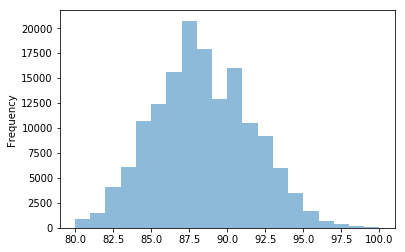

In [103]:
wine_drop['points'].plot.hist(alpha=0.5,bins=20)
plt.show()

price数据的直方图

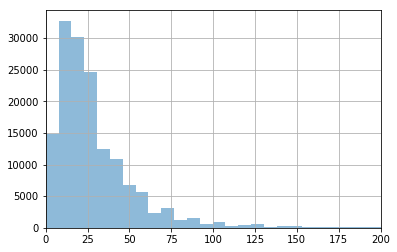

In [77]:
plt.xlim(0,200)
wine_drop['price'].hist(alpha=0.5,bins=300)
plt.show()

points的盒图

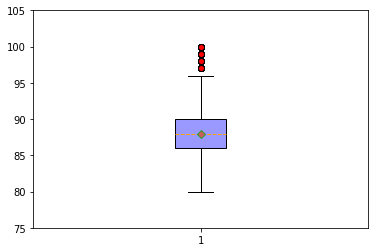

In [78]:
plt.boxplot(x = wine_drop['points'], # 指定绘图数据
            patch_artist=True, # 要求用自定义颜色填充盒形图，默认白色填充
            showmeans=True, # 以点的形式显示均值
            boxprops = {'color':'black','facecolor':'#9999ff'}, # 设置箱体属性，填充色和边框色
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # 设置异常值属性，点的形状、填充色和边框色
            meanprops = {'marker':'D','markerfacecolor':'indianred'}, # 设置均值点的属性，点的形状、填充色
            medianprops = {'linestyle':'--','color':'orange'}) # 设置中位数线的属性，线的类型和颜色
# 设置y轴的范围
plt.ylim(75,105)
plt.tick_params(top='off', right='off')
plt.show()

price数据的盒图

In [ ]:
plt.boxplot(x = wine_drop['price'], # 指定绘图数据
            patch_artist=True, # 要求用自定义颜色填充盒形图，默认白色填充
            showmeans=True, # 以点的形式显示均值
            boxprops = {'color':'black','facecolor':'#9999ff'}, # 设置箱体属性，填充色和边框色
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # 设置异常值属性，点的形状、填充色和边框色
            meanprops = {'marker':'D','markerfacecolor':'indianred'}, # 设置均值点的属性，点的形状、填充色
            medianprops = {'linestyle':'--','color':'orange'}) # 设置中位数线的属性，线的类型和颜色
# 设置y轴的范围
plt.ylim(75,105)
plt.tick_params(top='off', right='off')
plt.ylim(-100,400)
plt.tick_params(top='off', right='off')
plt.show()
plt.show()

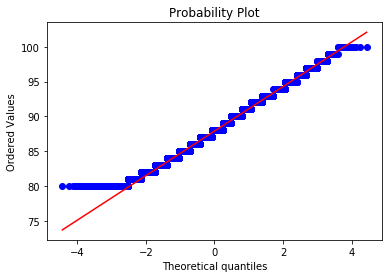

In [80]:
stats.probplot(wine_drop['points'],dist='norm',plot=plt)
plt.show()

我们做除了[points]的累计分布图，并根据累计分布图做出了[points]的QQ图。 QQ图是一种散点图，对应于正态分布的QQ图，就是由标准正态分布的分位数为横坐标，样本值为纵坐标的散点图，QQ图用于鉴别样本数据是否近似于正态分布，如果QQ图上的点是否近似地在一条直线附近，图形是直线说明是正态分布，而且该直线的斜率为标准差，截距为均值。 根据QQ图的绘制结果我们发现[points]的QQ图几乎在一条直线上，说明[points]的分布基本符合正态分布。

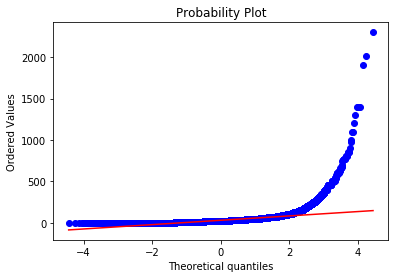

In [81]:
stats.probplot(wine_drop['price'],dist='norm',plot=plt)
plt.show()

接着我们做除了[price]的累计分布图，并根据累计分布图做出了[price]的QQ图。 QQ图是一种散点图，对应于正态分布的QQ图，就是由标准正态分布的分位数为横坐标，样本值为纵坐标的散点图，QQ图用于鉴别样本数据是否近似于正态分布，如果QQ图上的点是否近似地在一条直线附近，图形是直线说明是正态分布，而且该直线的斜率为标准差，截距为均值。 根据QQ图的绘制结果我们发现[points]的QQ图因为存在很多大的离群值，所以不满足正态分布，但是我们发现除去大于500的点之后，剩下的点几乎在一条直线上，说明在0-500的区间内[points]符合正态分布。

## 2 数据缺失的处理
根据第一部分的统计，我们发现在[price]属性中存在着13695条数据缺失记录。通过分析我们发现这些缺失值大多都是固定地区的评分较低的葡萄酒的价格数据，因此这些数据可能是因为这些葡萄酒的数据因为销量太少而被忽略。 针对缺失的数据我们采用四种方法来进行处理:

第一种是删除缺失数据；

第二种是用最高频率值来填补缺失值；

第三种是通过属性的相关关系来填补缺失值；

第四种是通过数据对象之间的相似性来填补缺失值。

### 2.1 删除缺失数据
这一步我们已经在最初数据处理过程中完成
### 2.2 用最高频率值来填补缺失数据
在这里 我们选择利用每一列的众数来填充本列缺失值

In [82]:
wines_mode=wines.copy()
for name in wines_mode.columns:
    if (name not in ['description', 'Unnamed: 0']):
        print(wines[name].mode()[0])
        wines_mode[name].fillna(value=wines[name].mode()[0],inplace=True)


US
0
87
0.0
California
0
0
Chardonnay
Williams Selyem


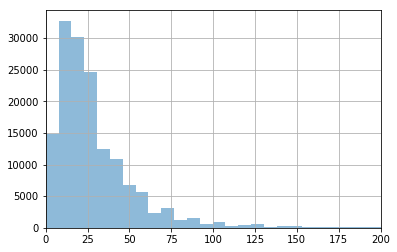

In [104]:
plt.xlim(0,200)
wines_mode['price'].hist(alpha=0.5,bins=300)
plt.show()

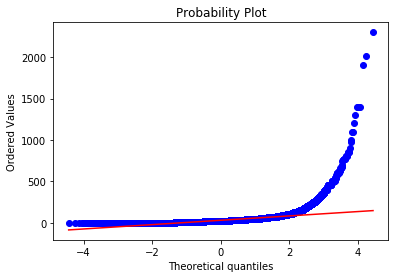

In [74]:
stats.probplot(wines_mode['price'],dist='norm',plot=plt)
plt.show()

### 2.3通过属性相关关系来填补缺失值
葡萄酒的价格与葡萄酒的评分有关。在这里，我们选择利用两个属性之间的相关关系进行预测。（受于篇幅，在这里仅填补prices的缺失数据）

F:\Users\wwwec\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


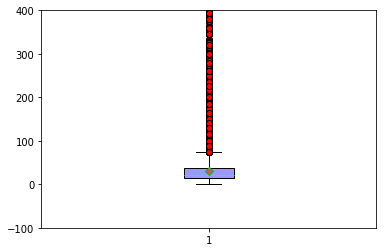

In [120]:
wines_col=wines.copy()
wines_col['price'].fillna(value=-10,inplace=True)
for l in range(len(wines_col['price'])):
    if wines_col.ix[l,'price']==-10:
        #rint(wines.ix[l,'price'])
        #print(wines_col.ix[l,'points'])
        tm=wines_col[wines_col['points']==wines_col.ix[l,'points']&wines_col['country']==wines_col.ix[l,'country']]
        wines_col.ix[l, 'price']=tm['points'].mode()[0]
        #print(tm)
plt.boxplot(x = wines_col['price'], # 指定绘图数据
            patch_artist=True, # 要求用自定义颜色填充盒形图，默认白色填充
            showmeans=True, # 以点的形式显示均值
            boxprops = {'color':'black','facecolor':'#9999ff'}, # 设置箱体属性，填充色和边框色
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # 设置异常值属性，点的形状、填充色和边框色
            meanprops = {'marker':'D','markerfacecolor':'indianred'}, # 设置均值点的属性，点的形状、填充色
            medianprops = {'linestyle':'--','color':'orange'}) # 设置中位数线的属性，线的类型和颜色
# 设置y轴的范围
plt.ylim(75,105)
plt.tick_params(top='off', right='off')
plt.ylim(-100,400)
plt.tick_params(top='off', right='off')
plt.show()


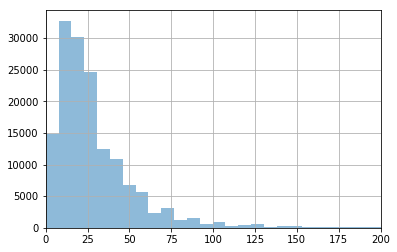

In [121]:
plt.xlim(0,200)
wines_col['price'].hist(alpha=0.5,bins=300)
plt.show()

In [122]:

wines_obj=wines.copy()
for l in range(len(wines_obj['price'])):
    if wines_obj.ix[l,'price']==-10:
        #print(wines.ix[l,'price'])

        tm=wines_obj[wines_obj.country==wines_obj.ix[l,'country']&wines_obj.province==wines_obj.ix[l,'province']&wine_obj.region_1==wines_obj.ix[l,'region_1']&ine_obj.region_1==wines_obj.ix[l,'region_2']]
        wines_obj.ix[l, 'price']=tm['points'].mode()[0]


F:\Users\wwwec\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


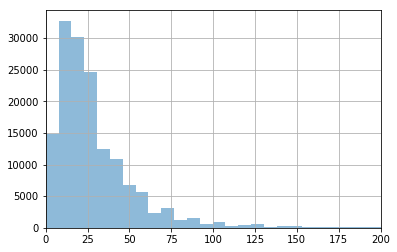

In [123]:
plt.xlim(0,200)
wines_obj['price'].hist(alpha=0.5,bins=300)
plt.show()